In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/2-4/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/2-4/totalOrders_1000_5000_100_2_5.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,2,993,pcaot,6,1.0
1,0,993,vpneq,10,2.0
2,3,993,vpneq,13,-1.0
3,2,993,jzndk,14,1.0
4,1,993,jwivu,13,-2.0
...,...,...,...,...,...
2139960,2,5992,khrsl,62,4.0
2139961,0,5992,sujzt,75,-6.0
2139962,1,5992,sujzt,62,4.0
2139963,0,5992,gdnqf,75,-91.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [5]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965
Cascade length:  2014
New Orders left:  2137951
making new cascade


OG Orders left:  2137951
Cascade length:  2561
New Orders left:  2135390
making new cascade


OG Orders left:  2135390
Cascade length:  2665
New Orders left:  2132725
making new cascade


OG Orders left:  2132725
Cascade length:  2582
New Orders left:  2130143
making new cascade


OG Orders left:  2130143
Cascade length:  4
New Orders left:  2130139
making new cascade


OG Orders left:  2130139
Cascade length:  2000
New Orders left:  2128139
making new cascade


OG Orders left:  2128139
Cascade length:  1
New Orders left:  2128138
making new cascade


OG Orders left:  2128138
Cascade length:  2
New Orders left:  2128136
making new cascade


OG Orders left:  2128136
Cascade length:  2646
New Orders left:  2125490
making new cascade


OG Orders left:  2125490
Cascade length:  2302
New Orders left:  2123188
making new cascade


OG Orders left:  2123188
Cascade length:  2308
New Orders left:  2120

Cascade length:  1431
New Orders left:  2049776
making new cascade


OG Orders left:  2049776
Cascade length:  2
New Orders left:  2049774
making new cascade


OG Orders left:  2049774
Cascade length:  1269
New Orders left:  2048505
making new cascade


OG Orders left:  2048505
Cascade length:  1155
New Orders left:  2047350
making new cascade


OG Orders left:  2047350
Cascade length:  1691
New Orders left:  2045659
making new cascade


OG Orders left:  2045659
Cascade length:  1667
New Orders left:  2043992
making new cascade


OG Orders left:  2043992
Cascade length:  7
New Orders left:  2043985
making new cascade


OG Orders left:  2043985
Cascade length:  1
New Orders left:  2043984
making new cascade


OG Orders left:  2043984
Cascade length:  932
New Orders left:  2043052
making new cascade


OG Orders left:  2043052
Cascade length:  1865
New Orders left:  2041187
making new cascade


OG Orders left:  2041187
Cascade length:  1692
New Orders left:  2039495
making new cascade


O

Cascade length:  12
New Orders left:  2007373
making new cascade


OG Orders left:  2007373
Cascade length:  5
New Orders left:  2007368
making new cascade


OG Orders left:  2007368
Cascade length:  992
New Orders left:  2006376
making new cascade


OG Orders left:  2006376
Cascade length:  746
New Orders left:  2005630
making new cascade


OG Orders left:  2005630
Cascade length:  823
New Orders left:  2004807
making new cascade


OG Orders left:  2004807
Cascade length:  406
New Orders left:  2004401
making new cascade


OG Orders left:  2004401
Cascade length:  9
New Orders left:  2004392
making new cascade


OG Orders left:  2004392
Cascade length:  794
New Orders left:  2003598
making new cascade


OG Orders left:  2003598
Cascade length:  5
New Orders left:  2003593
making new cascade


OG Orders left:  2003593
Cascade length:  6
New Orders left:  2003587
making new cascade


OG Orders left:  2003587
Cascade length:  1023
New Orders left:  2002564
making new cascade


OG Orders 

Cascade length:  2
New Orders left:  1976415
making new cascade


OG Orders left:  1976415
Cascade length:  4
New Orders left:  1976411
making new cascade


OG Orders left:  1976411
Cascade length:  145
New Orders left:  1976266
making new cascade


OG Orders left:  1976266
Cascade length:  8
New Orders left:  1976258
making new cascade


OG Orders left:  1976258
Cascade length:  837
New Orders left:  1975421
making new cascade


OG Orders left:  1975421
Cascade length:  2
New Orders left:  1975419
making new cascade


OG Orders left:  1975419
Cascade length:  4
New Orders left:  1975415
making new cascade


OG Orders left:  1975415
Cascade length:  5
New Orders left:  1975410
making new cascade


OG Orders left:  1975410
Cascade length:  268
New Orders left:  1975142
making new cascade


OG Orders left:  1975142
Cascade length:  5
New Orders left:  1975137
making new cascade


OG Orders left:  1975137
Cascade length:  610
New Orders left:  1974527
making new cascade


OG Orders left: 

Cascade length:  69
New Orders left:  1952805
making new cascade


OG Orders left:  1952805
Cascade length:  8
New Orders left:  1952797
making new cascade


OG Orders left:  1952797
Cascade length:  705
New Orders left:  1952092
making new cascade


OG Orders left:  1952092
Cascade length:  54
New Orders left:  1952038
making new cascade


OG Orders left:  1952038
Cascade length:  56
New Orders left:  1951982
making new cascade


OG Orders left:  1951982
Cascade length:  144
New Orders left:  1951838
making new cascade


OG Orders left:  1951838
Cascade length:  20
New Orders left:  1951818
making new cascade


OG Orders left:  1951818
Cascade length:  1
New Orders left:  1951817
making new cascade


OG Orders left:  1951817
Cascade length:  415
New Orders left:  1951402
making new cascade


OG Orders left:  1951402
Cascade length:  3
New Orders left:  1951399
making new cascade


OG Orders left:  1951399
Cascade length:  562
New Orders left:  1950837
making new cascade


OG Orders le

Cascade length:  4
New Orders left:  1932283
making new cascade


OG Orders left:  1932283
Cascade length:  685
New Orders left:  1931598
making new cascade


OG Orders left:  1931598
Cascade length:  10
New Orders left:  1931588
making new cascade


OG Orders left:  1931588
Cascade length:  1
New Orders left:  1931587
making new cascade


OG Orders left:  1931587
Cascade length:  15
New Orders left:  1931572
making new cascade


OG Orders left:  1931572
Cascade length:  19
New Orders left:  1931553
making new cascade


OG Orders left:  1931553
Cascade length:  1148
New Orders left:  1930405
making new cascade


OG Orders left:  1930405
Cascade length:  1
New Orders left:  1930404
making new cascade


OG Orders left:  1930404
Cascade length:  10
New Orders left:  1930394
making new cascade


OG Orders left:  1930394
Cascade length:  3
New Orders left:  1930391
making new cascade


OG Orders left:  1930391
Cascade length:  10
New Orders left:  1930381
making new cascade


OG Orders left

Cascade length:  4
New Orders left:  1916907
making new cascade


OG Orders left:  1916907
Cascade length:  656
New Orders left:  1916251
making new cascade


OG Orders left:  1916251
Cascade length:  10
New Orders left:  1916241
making new cascade


OG Orders left:  1916241
Cascade length:  1
New Orders left:  1916240
making new cascade


OG Orders left:  1916240
Cascade length:  7
New Orders left:  1916233
making new cascade


OG Orders left:  1916233
Cascade length:  18
New Orders left:  1916215
making new cascade


OG Orders left:  1916215
Cascade length:  611
New Orders left:  1915604
making new cascade


OG Orders left:  1915604
Cascade length:  10
New Orders left:  1915594
making new cascade


OG Orders left:  1915594
Cascade length:  114
New Orders left:  1915480
making new cascade


OG Orders left:  1915480
Cascade length:  22
New Orders left:  1915458
making new cascade


OG Orders left:  1915458
Cascade length:  172
New Orders left:  1915286
making new cascade


OG Orders le

Cascade length:  1
New Orders left:  1903093
making new cascade


OG Orders left:  1903093
Cascade length:  4
New Orders left:  1903089
making new cascade


OG Orders left:  1903089
Cascade length:  52
New Orders left:  1903037
making new cascade


OG Orders left:  1903037
Cascade length:  6
New Orders left:  1903031
making new cascade


OG Orders left:  1903031
Cascade length:  7
New Orders left:  1903024
making new cascade


OG Orders left:  1903024
Cascade length:  315
New Orders left:  1902709
making new cascade


OG Orders left:  1902709
Cascade length:  51
New Orders left:  1902658
making new cascade


OG Orders left:  1902658
Cascade length:  41
New Orders left:  1902617
making new cascade


OG Orders left:  1902617
Cascade length:  486
New Orders left:  1902131
making new cascade


OG Orders left:  1902131
Cascade length:  23
New Orders left:  1902108
making new cascade


OG Orders left:  1902108
Cascade length:  31
New Orders left:  1902077
making new cascade


OG Orders left:

Cascade length:  12
New Orders left:  1887022
making new cascade


OG Orders left:  1887022
Cascade length:  1
New Orders left:  1887021
making new cascade


OG Orders left:  1887021
Cascade length:  18
New Orders left:  1887003
making new cascade


OG Orders left:  1887003
Cascade length:  112
New Orders left:  1886891
making new cascade


OG Orders left:  1886891
Cascade length:  1
New Orders left:  1886890
making new cascade


OG Orders left:  1886890
Cascade length:  10
New Orders left:  1886880
making new cascade


OG Orders left:  1886880
Cascade length:  1
New Orders left:  1886879
making new cascade


OG Orders left:  1886879
Cascade length:  222
New Orders left:  1886657
making new cascade


OG Orders left:  1886657
Cascade length:  72
New Orders left:  1886585
making new cascade


OG Orders left:  1886585
Cascade length:  754
New Orders left:  1885831
making new cascade


OG Orders left:  1885831
Cascade length:  20
New Orders left:  1885811
making new cascade


OG Orders lef

Cascade length:  2
New Orders left:  1877660
making new cascade


OG Orders left:  1877660
Cascade length:  8
New Orders left:  1877652
making new cascade


OG Orders left:  1877652
Cascade length:  4
New Orders left:  1877648
making new cascade


OG Orders left:  1877648
Cascade length:  6
New Orders left:  1877642
making new cascade


OG Orders left:  1877642
Cascade length:  4
New Orders left:  1877638
making new cascade


OG Orders left:  1877638
Cascade length:  356
New Orders left:  1877282
making new cascade


OG Orders left:  1877282
Cascade length:  15
New Orders left:  1877267
making new cascade


OG Orders left:  1877267
Cascade length:  73
New Orders left:  1877194
making new cascade


OG Orders left:  1877194
Cascade length:  1
New Orders left:  1877193
making new cascade


OG Orders left:  1877193
Cascade length:  186
New Orders left:  1877007
making new cascade


OG Orders left:  1877007
Cascade length:  995
New Orders left:  1876012
making new cascade


OG Orders left: 

Cascade length:  61
New Orders left:  1868162
making new cascade


OG Orders left:  1868162
Cascade length:  425
New Orders left:  1867737
making new cascade


OG Orders left:  1867737
Cascade length:  4
New Orders left:  1867733
making new cascade


OG Orders left:  1867733
Cascade length:  4
New Orders left:  1867729
making new cascade


OG Orders left:  1867729
Cascade length:  3
New Orders left:  1867726
making new cascade


OG Orders left:  1867726
Cascade length:  12
New Orders left:  1867714
making new cascade


OG Orders left:  1867714
Cascade length:  245
New Orders left:  1867469
making new cascade


OG Orders left:  1867469
Cascade length:  11
New Orders left:  1867458
making new cascade


OG Orders left:  1867458
Cascade length:  815
New Orders left:  1866643
making new cascade


OG Orders left:  1866643
Cascade length:  31
New Orders left:  1866612
making new cascade


OG Orders left:  1866612
Cascade length:  3
New Orders left:  1866609
making new cascade


OG Orders left

Cascade length:  1
New Orders left:  1858120
making new cascade


OG Orders left:  1858120
Cascade length:  19
New Orders left:  1858101
making new cascade


OG Orders left:  1858101
Cascade length:  14
New Orders left:  1858087
making new cascade


OG Orders left:  1858087
Cascade length:  2
New Orders left:  1858085
making new cascade


OG Orders left:  1858085
Cascade length:  37
New Orders left:  1858048
making new cascade


OG Orders left:  1858048
Cascade length:  35
New Orders left:  1858013
making new cascade


OG Orders left:  1858013
Cascade length:  592
New Orders left:  1857421
making new cascade


OG Orders left:  1857421
Cascade length:  5
New Orders left:  1857416
making new cascade


OG Orders left:  1857416
Cascade length:  3
New Orders left:  1857413
making new cascade


OG Orders left:  1857413
Cascade length:  1316
New Orders left:  1856097
making new cascade


OG Orders left:  1856097
Cascade length:  87
New Orders left:  1856010
making new cascade


OG Orders left

Cascade length:  114
New Orders left:  1846106
making new cascade


OG Orders left:  1846106
Cascade length:  193
New Orders left:  1845913
making new cascade


OG Orders left:  1845913
Cascade length:  2
New Orders left:  1845911
making new cascade


OG Orders left:  1845911
Cascade length:  656
New Orders left:  1845255
making new cascade


OG Orders left:  1845255
Cascade length:  11
New Orders left:  1845244
making new cascade


OG Orders left:  1845244
Cascade length:  6
New Orders left:  1845238
making new cascade


OG Orders left:  1845238
Cascade length:  5
New Orders left:  1845233
making new cascade


OG Orders left:  1845233
Cascade length:  4
New Orders left:  1845229
making new cascade


OG Orders left:  1845229
Cascade length:  87
New Orders left:  1845142
making new cascade


OG Orders left:  1845142
Cascade length:  1
New Orders left:  1845141
making new cascade


OG Orders left:  1845141
Cascade length:  68
New Orders left:  1845073
making new cascade


OG Orders left:

Cascade length:  281
New Orders left:  1831506
making new cascade


OG Orders left:  1831506
Cascade length:  11
New Orders left:  1831495
making new cascade


OG Orders left:  1831495
Cascade length:  96
New Orders left:  1831399
making new cascade


OG Orders left:  1831399
Cascade length:  3
New Orders left:  1831396
making new cascade


OG Orders left:  1831396
Cascade length:  5
New Orders left:  1831391
making new cascade


OG Orders left:  1831391
Cascade length:  83
New Orders left:  1831308
making new cascade


OG Orders left:  1831308
Cascade length:  557
New Orders left:  1830751
making new cascade


OG Orders left:  1830751
Cascade length:  1
New Orders left:  1830750
making new cascade


OG Orders left:  1830750
Cascade length:  1
New Orders left:  1830749
making new cascade


OG Orders left:  1830749
Cascade length:  21
New Orders left:  1830728
making new cascade


OG Orders left:  1830728
Cascade length:  83
New Orders left:  1830645
making new cascade


OG Orders left:

Cascade length:  398
New Orders left:  1809567
making new cascade


OG Orders left:  1809567
Cascade length:  337
New Orders left:  1809230
making new cascade


OG Orders left:  1809230
Cascade length:  477
New Orders left:  1808753
making new cascade


OG Orders left:  1808753
Cascade length:  2
New Orders left:  1808751
making new cascade


OG Orders left:  1808751
Cascade length:  1039
New Orders left:  1807712
making new cascade


OG Orders left:  1807712
Cascade length:  18
New Orders left:  1807694
making new cascade


OG Orders left:  1807694
Cascade length:  7
New Orders left:  1807687
making new cascade


OG Orders left:  1807687
Cascade length:  4
New Orders left:  1807683
making new cascade


OG Orders left:  1807683
Cascade length:  31
New Orders left:  1807652
making new cascade


OG Orders left:  1807652
Cascade length:  4
New Orders left:  1807648
making new cascade


OG Orders left:  1807648
Cascade length:  3
New Orders left:  1807645
making new cascade


OG Orders lef

Cascade length:  23
New Orders left:  1789188
making new cascade


OG Orders left:  1789188
Cascade length:  11
New Orders left:  1789177
making new cascade


OG Orders left:  1789177
Cascade length:  5
New Orders left:  1789172
making new cascade


OG Orders left:  1789172
Cascade length:  213
New Orders left:  1788959
making new cascade


OG Orders left:  1788959
Cascade length:  9
New Orders left:  1788950
making new cascade


OG Orders left:  1788950
Cascade length:  22
New Orders left:  1788928
making new cascade


OG Orders left:  1788928
Cascade length:  429
New Orders left:  1788499
making new cascade


OG Orders left:  1788499
Cascade length:  616
New Orders left:  1787883
making new cascade


OG Orders left:  1787883
Cascade length:  514
New Orders left:  1787369
making new cascade


OG Orders left:  1787369
Cascade length:  3
New Orders left:  1787366
making new cascade


OG Orders left:  1787366
Cascade length:  15
New Orders left:  1787351
making new cascade


OG Orders le

Cascade length:  544
New Orders left:  1778885
making new cascade


OG Orders left:  1778885
Cascade length:  6
New Orders left:  1778879
making new cascade


OG Orders left:  1778879
Cascade length:  237
New Orders left:  1778642
making new cascade


OG Orders left:  1778642
Cascade length:  1
New Orders left:  1778641
making new cascade


OG Orders left:  1778641
Cascade length:  6
New Orders left:  1778635
making new cascade


OG Orders left:  1778635
Cascade length:  2
New Orders left:  1778633
making new cascade


OG Orders left:  1778633
Cascade length:  187
New Orders left:  1778446
making new cascade


OG Orders left:  1778446
Cascade length:  690
New Orders left:  1777756
making new cascade


OG Orders left:  1777756
Cascade length:  2
New Orders left:  1777754
making new cascade


OG Orders left:  1777754
Cascade length:  1
New Orders left:  1777753
making new cascade


OG Orders left:  1777753
Cascade length:  11
New Orders left:  1777742
making new cascade


OG Orders left:

Cascade length:  3
New Orders left:  1762407
making new cascade


OG Orders left:  1762407
Cascade length:  5
New Orders left:  1762402
making new cascade


OG Orders left:  1762402
Cascade length:  1
New Orders left:  1762401
making new cascade


OG Orders left:  1762401
Cascade length:  1108
New Orders left:  1761293
making new cascade


OG Orders left:  1761293
Cascade length:  7
New Orders left:  1761286
making new cascade


OG Orders left:  1761286
Cascade length:  369
New Orders left:  1760917
making new cascade


OG Orders left:  1760917
Cascade length:  2
New Orders left:  1760915
making new cascade


OG Orders left:  1760915
Cascade length:  183
New Orders left:  1760732
making new cascade


OG Orders left:  1760732
Cascade length:  197
New Orders left:  1760535
making new cascade


OG Orders left:  1760535
Cascade length:  458
New Orders left:  1760077
making new cascade


OG Orders left:  1760077
Cascade length:  12
New Orders left:  1760065
making new cascade


OG Orders le

Cascade length:  5
New Orders left:  1745259
making new cascade


OG Orders left:  1745259
Cascade length:  2
New Orders left:  1745257
making new cascade


OG Orders left:  1745257
Cascade length:  312
New Orders left:  1744945
making new cascade


OG Orders left:  1744945
Cascade length:  4
New Orders left:  1744941
making new cascade


OG Orders left:  1744941
Cascade length:  173
New Orders left:  1744768
making new cascade


OG Orders left:  1744768
Cascade length:  4
New Orders left:  1744764
making new cascade


OG Orders left:  1744764
Cascade length:  666
New Orders left:  1744098
making new cascade


OG Orders left:  1744098
Cascade length:  9
New Orders left:  1744089
making new cascade


OG Orders left:  1744089
Cascade length:  107
New Orders left:  1743982
making new cascade


OG Orders left:  1743982
Cascade length:  246
New Orders left:  1743736
making new cascade


OG Orders left:  1743736
Cascade length:  5
New Orders left:  1743731
making new cascade


OG Orders left

Cascade length:  1240
New Orders left:  1731424
making new cascade


OG Orders left:  1731424
Cascade length:  203
New Orders left:  1731221
making new cascade


OG Orders left:  1731221
Cascade length:  32
New Orders left:  1731189
making new cascade


OG Orders left:  1731189
Cascade length:  188
New Orders left:  1731001
making new cascade


OG Orders left:  1731001
Cascade length:  2
New Orders left:  1730999
making new cascade


OG Orders left:  1730999
Cascade length:  127
New Orders left:  1730872
making new cascade


OG Orders left:  1730872
Cascade length:  744
New Orders left:  1730128
making new cascade


OG Orders left:  1730128
Cascade length:  5
New Orders left:  1730123
making new cascade


OG Orders left:  1730123
Cascade length:  355
New Orders left:  1729768
making new cascade


OG Orders left:  1729768
Cascade length:  10
New Orders left:  1729758
making new cascade


OG Orders left:  1729758
Cascade length:  9
New Orders left:  1729749
making new cascade


OG Orders

Cascade length:  7
New Orders left:  1717150
making new cascade


OG Orders left:  1717150
Cascade length:  633
New Orders left:  1716517
making new cascade


OG Orders left:  1716517
Cascade length:  282
New Orders left:  1716235
making new cascade


OG Orders left:  1716235
Cascade length:  15
New Orders left:  1716220
making new cascade


OG Orders left:  1716220
Cascade length:  1
New Orders left:  1716219
making new cascade


OG Orders left:  1716219
Cascade length:  723
New Orders left:  1715496
making new cascade


OG Orders left:  1715496
Cascade length:  9
New Orders left:  1715487
making new cascade


OG Orders left:  1715487
Cascade length:  605
New Orders left:  1714882
making new cascade


OG Orders left:  1714882
Cascade length:  3
New Orders left:  1714879
making new cascade


OG Orders left:  1714879
Cascade length:  647
New Orders left:  1714232
making new cascade


OG Orders left:  1714232
Cascade length:  3
New Orders left:  1714229
making new cascade


OG Orders lef

Cascade length:  2
New Orders left:  1688223
making new cascade


OG Orders left:  1688223
Cascade length:  2
New Orders left:  1688221
making new cascade


OG Orders left:  1688221
Cascade length:  851
New Orders left:  1687370
making new cascade


OG Orders left:  1687370
Cascade length:  2
New Orders left:  1687368
making new cascade


OG Orders left:  1687368
Cascade length:  680
New Orders left:  1686688
making new cascade


OG Orders left:  1686688
Cascade length:  468
New Orders left:  1686220
making new cascade


OG Orders left:  1686220
Cascade length:  691
New Orders left:  1685529
making new cascade


OG Orders left:  1685529
Cascade length:  565
New Orders left:  1684964
making new cascade


OG Orders left:  1684964
Cascade length:  2
New Orders left:  1684962
making new cascade


OG Orders left:  1684962
Cascade length:  1020
New Orders left:  1683942
making new cascade


OG Orders left:  1683942
Cascade length:  1
New Orders left:  1683941
making new cascade


OG Orders l

Cascade length:  36
New Orders left:  1656707
making new cascade


OG Orders left:  1656707
Cascade length:  702
New Orders left:  1656005
making new cascade


OG Orders left:  1656005
Cascade length:  12
New Orders left:  1655993
making new cascade


OG Orders left:  1655993
Cascade length:  304
New Orders left:  1655689
making new cascade


OG Orders left:  1655689
Cascade length:  6
New Orders left:  1655683
making new cascade


OG Orders left:  1655683
Cascade length:  338
New Orders left:  1655345
making new cascade


OG Orders left:  1655345
Cascade length:  919
New Orders left:  1654426
making new cascade


OG Orders left:  1654426
Cascade length:  161
New Orders left:  1654265
making new cascade


OG Orders left:  1654265
Cascade length:  1
New Orders left:  1654264
making new cascade


OG Orders left:  1654264
Cascade length:  3
New Orders left:  1654261
making new cascade


OG Orders left:  1654261
Cascade length:  232
New Orders left:  1654029
making new cascade


OG Orders 

Cascade length:  4
New Orders left:  1633898
making new cascade


OG Orders left:  1633898
Cascade length:  1
New Orders left:  1633897
making new cascade


OG Orders left:  1633897
Cascade length:  439
New Orders left:  1633458
making new cascade


OG Orders left:  1633458
Cascade length:  23
New Orders left:  1633435
making new cascade


OG Orders left:  1633435
Cascade length:  16
New Orders left:  1633419
making new cascade


OG Orders left:  1633419
Cascade length:  160
New Orders left:  1633259
making new cascade


OG Orders left:  1633259
Cascade length:  333
New Orders left:  1632926
making new cascade


OG Orders left:  1632926
Cascade length:  236
New Orders left:  1632690
making new cascade


OG Orders left:  1632690
Cascade length:  1
New Orders left:  1632689
making new cascade


OG Orders left:  1632689
Cascade length:  109
New Orders left:  1632580
making new cascade


OG Orders left:  1632580
Cascade length:  27
New Orders left:  1632553
making new cascade


OG Orders l

Cascade length:  1
New Orders left:  1619650
making new cascade


OG Orders left:  1619650
Cascade length:  1
New Orders left:  1619649
making new cascade


OG Orders left:  1619649
Cascade length:  4
New Orders left:  1619645
making new cascade


OG Orders left:  1619645
Cascade length:  583
New Orders left:  1619062
making new cascade


OG Orders left:  1619062
Cascade length:  2
New Orders left:  1619060
making new cascade


OG Orders left:  1619060
Cascade length:  47
New Orders left:  1619013
making new cascade


OG Orders left:  1619013
Cascade length:  453
New Orders left:  1618560
making new cascade


OG Orders left:  1618560
Cascade length:  14
New Orders left:  1618546
making new cascade


OG Orders left:  1618546
Cascade length:  7
New Orders left:  1618539
making new cascade


OG Orders left:  1618539
Cascade length:  36
New Orders left:  1618503
making new cascade


OG Orders left:  1618503
Cascade length:  5
New Orders left:  1618498
making new cascade


OG Orders left:  

Cascade length:  4
New Orders left:  1601534
making new cascade


OG Orders left:  1601534
Cascade length:  131
New Orders left:  1601403
making new cascade


OG Orders left:  1601403
Cascade length:  7
New Orders left:  1601396
making new cascade


OG Orders left:  1601396
Cascade length:  73
New Orders left:  1601323
making new cascade


OG Orders left:  1601323
Cascade length:  19
New Orders left:  1601304
making new cascade


OG Orders left:  1601304
Cascade length:  9
New Orders left:  1601295
making new cascade


OG Orders left:  1601295
Cascade length:  1350
New Orders left:  1599945
making new cascade


OG Orders left:  1599945
Cascade length:  4
New Orders left:  1599941
making new cascade


OG Orders left:  1599941
Cascade length:  581
New Orders left:  1599360
making new cascade


OG Orders left:  1599360
Cascade length:  2
New Orders left:  1599358
making new cascade


OG Orders left:  1599358
Cascade length:  80
New Orders left:  1599278
making new cascade


OG Orders left

Cascade length:  25
New Orders left:  1585987
making new cascade


OG Orders left:  1585987
Cascade length:  3
New Orders left:  1585984
making new cascade


OG Orders left:  1585984
Cascade length:  775
New Orders left:  1585209
making new cascade


OG Orders left:  1585209
Cascade length:  37
New Orders left:  1585172
making new cascade


OG Orders left:  1585172
Cascade length:  624
New Orders left:  1584548
making new cascade


OG Orders left:  1584548
Cascade length:  531
New Orders left:  1584017
making new cascade


OG Orders left:  1584017
Cascade length:  82
New Orders left:  1583935
making new cascade


OG Orders left:  1583935
Cascade length:  13
New Orders left:  1583922
making new cascade


OG Orders left:  1583922
Cascade length:  6
New Orders left:  1583916
making new cascade


OG Orders left:  1583916
Cascade length:  713
New Orders left:  1583203
making new cascade


OG Orders left:  1583203
Cascade length:  473
New Orders left:  1582730
making new cascade


OG Orders 

Cascade length:  539
New Orders left:  1564569
making new cascade


OG Orders left:  1564569
Cascade length:  40
New Orders left:  1564529
making new cascade


OG Orders left:  1564529
Cascade length:  15
New Orders left:  1564514
making new cascade


OG Orders left:  1564514
Cascade length:  2
New Orders left:  1564512
making new cascade


OG Orders left:  1564512
Cascade length:  1002
New Orders left:  1563510
making new cascade


OG Orders left:  1563510
Cascade length:  2
New Orders left:  1563508
making new cascade


OG Orders left:  1563508
Cascade length:  4
New Orders left:  1563504
making new cascade


OG Orders left:  1563504
Cascade length:  7
New Orders left:  1563497
making new cascade


OG Orders left:  1563497
Cascade length:  928
New Orders left:  1562569
making new cascade


OG Orders left:  1562569
Cascade length:  585
New Orders left:  1561984
making new cascade


OG Orders left:  1561984
Cascade length:  754
New Orders left:  1561230
making new cascade


OG Orders l

Cascade length:  162
New Orders left:  1544287
making new cascade


OG Orders left:  1544287
Cascade length:  72
New Orders left:  1544215
making new cascade


OG Orders left:  1544215
Cascade length:  45
New Orders left:  1544170
making new cascade


OG Orders left:  1544170
Cascade length:  882
New Orders left:  1543288
making new cascade


OG Orders left:  1543288
Cascade length:  366
New Orders left:  1542922
making new cascade


OG Orders left:  1542922
Cascade length:  11
New Orders left:  1542911
making new cascade


OG Orders left:  1542911
Cascade length:  343
New Orders left:  1542568
making new cascade


OG Orders left:  1542568
Cascade length:  76
New Orders left:  1542492
making new cascade


OG Orders left:  1542492
Cascade length:  14
New Orders left:  1542478
making new cascade


OG Orders left:  1542478
Cascade length:  1
New Orders left:  1542477
making new cascade


OG Orders left:  1542477
Cascade length:  4
New Orders left:  1542473
making new cascade


OG Orders l

Cascade length:  4
New Orders left:  1531878
making new cascade


OG Orders left:  1531878
Cascade length:  3
New Orders left:  1531875
making new cascade


OG Orders left:  1531875
Cascade length:  12
New Orders left:  1531863
making new cascade


OG Orders left:  1531863
Cascade length:  1118
New Orders left:  1530745
making new cascade


OG Orders left:  1530745
Cascade length:  24
New Orders left:  1530721
making new cascade


OG Orders left:  1530721
Cascade length:  15
New Orders left:  1530706
making new cascade


OG Orders left:  1530706
Cascade length:  1
New Orders left:  1530705
making new cascade


OG Orders left:  1530705
Cascade length:  219
New Orders left:  1530486
making new cascade


OG Orders left:  1530486
Cascade length:  8
New Orders left:  1530478
making new cascade


OG Orders left:  1530478
Cascade length:  1085
New Orders left:  1529393
making new cascade


OG Orders left:  1529393
Cascade length:  606
New Orders left:  1528787
making new cascade


OG Orders l

Cascade length:  117
New Orders left:  1508648
making new cascade


OG Orders left:  1508648
Cascade length:  11
New Orders left:  1508637
making new cascade


OG Orders left:  1508637
Cascade length:  47
New Orders left:  1508590
making new cascade


OG Orders left:  1508590
Cascade length:  1
New Orders left:  1508589
making new cascade


OG Orders left:  1508589
Cascade length:  807
New Orders left:  1507782
making new cascade


OG Orders left:  1507782
Cascade length:  696
New Orders left:  1507086
making new cascade


OG Orders left:  1507086
Cascade length:  57
New Orders left:  1507029
making new cascade


OG Orders left:  1507029
Cascade length:  7
New Orders left:  1507022
making new cascade


OG Orders left:  1507022
Cascade length:  226
New Orders left:  1506796
making new cascade


OG Orders left:  1506796
Cascade length:  2
New Orders left:  1506794
making new cascade


OG Orders left:  1506794
Cascade length:  1
New Orders left:  1506793
making new cascade


OG Orders lef

Cascade length:  105
New Orders left:  1487852
making new cascade


OG Orders left:  1487852
Cascade length:  1
New Orders left:  1487851
making new cascade


OG Orders left:  1487851
Cascade length:  18
New Orders left:  1487833
making new cascade


OG Orders left:  1487833
Cascade length:  78
New Orders left:  1487755
making new cascade


OG Orders left:  1487755
Cascade length:  2
New Orders left:  1487753
making new cascade


OG Orders left:  1487753
Cascade length:  65
New Orders left:  1487688
making new cascade


OG Orders left:  1487688
Cascade length:  1027
New Orders left:  1486661
making new cascade


OG Orders left:  1486661
Cascade length:  2
New Orders left:  1486659
making new cascade


OG Orders left:  1486659
Cascade length:  4
New Orders left:  1486655
making new cascade


OG Orders left:  1486655
Cascade length:  6
New Orders left:  1486649
making new cascade


OG Orders left:  1486649
Cascade length:  780
New Orders left:  1485869
making new cascade


OG Orders left

Cascade length:  3
New Orders left:  1470333
making new cascade


OG Orders left:  1470333
Cascade length:  26
New Orders left:  1470307
making new cascade


OG Orders left:  1470307
Cascade length:  16
New Orders left:  1470291
making new cascade


OG Orders left:  1470291
Cascade length:  101
New Orders left:  1470190
making new cascade


OG Orders left:  1470190
Cascade length:  86
New Orders left:  1470104
making new cascade


OG Orders left:  1470104
Cascade length:  17
New Orders left:  1470087
making new cascade


OG Orders left:  1470087
Cascade length:  1
New Orders left:  1470086
making new cascade


OG Orders left:  1470086
Cascade length:  334
New Orders left:  1469752
making new cascade


OG Orders left:  1469752
Cascade length:  1
New Orders left:  1469751
making new cascade


OG Orders left:  1469751
Cascade length:  583
New Orders left:  1469168
making new cascade


OG Orders left:  1469168
Cascade length:  214
New Orders left:  1468954
making new cascade


OG Orders le

Cascade length:  104
New Orders left:  1452453
making new cascade


OG Orders left:  1452453
Cascade length:  2
New Orders left:  1452451
making new cascade


OG Orders left:  1452451
Cascade length:  111
New Orders left:  1452340
making new cascade


OG Orders left:  1452340
Cascade length:  116
New Orders left:  1452224
making new cascade


OG Orders left:  1452224
Cascade length:  384
New Orders left:  1451840
making new cascade


OG Orders left:  1451840
Cascade length:  778
New Orders left:  1451062
making new cascade


OG Orders left:  1451062
Cascade length:  83
New Orders left:  1450979
making new cascade


OG Orders left:  1450979
Cascade length:  14
New Orders left:  1450965
making new cascade


OG Orders left:  1450965
Cascade length:  12
New Orders left:  1450953
making new cascade


OG Orders left:  1450953
Cascade length:  32
New Orders left:  1450921
making new cascade


OG Orders left:  1450921
Cascade length:  77
New Orders left:  1450844
making new cascade


OG Orders

Cascade length:  17
New Orders left:  1429171
making new cascade


OG Orders left:  1429171
Cascade length:  2
New Orders left:  1429169
making new cascade


OG Orders left:  1429169
Cascade length:  5
New Orders left:  1429164
making new cascade


OG Orders left:  1429164
Cascade length:  301
New Orders left:  1428863
making new cascade


OG Orders left:  1428863
Cascade length:  170
New Orders left:  1428693
making new cascade


OG Orders left:  1428693
Cascade length:  2
New Orders left:  1428691
making new cascade


OG Orders left:  1428691
Cascade length:  43
New Orders left:  1428648
making new cascade


OG Orders left:  1428648
Cascade length:  671
New Orders left:  1427977
making new cascade


OG Orders left:  1427977
Cascade length:  659
New Orders left:  1427318
making new cascade


OG Orders left:  1427318
Cascade length:  274
New Orders left:  1427044
making new cascade


OG Orders left:  1427044
Cascade length:  1
New Orders left:  1427043
making new cascade


OG Orders le

Cascade length:  27
New Orders left:  1407667
making new cascade


OG Orders left:  1407667
Cascade length:  636
New Orders left:  1407031
making new cascade


OG Orders left:  1407031
Cascade length:  2
New Orders left:  1407029
making new cascade


OG Orders left:  1407029
Cascade length:  992
New Orders left:  1406037
making new cascade


OG Orders left:  1406037
Cascade length:  107
New Orders left:  1405930
making new cascade


OG Orders left:  1405930
Cascade length:  1231
New Orders left:  1404699
making new cascade


OG Orders left:  1404699
Cascade length:  1
New Orders left:  1404698
making new cascade


OG Orders left:  1404698
Cascade length:  8
New Orders left:  1404690
making new cascade


OG Orders left:  1404690
Cascade length:  6
New Orders left:  1404684
making new cascade


OG Orders left:  1404684
Cascade length:  2
New Orders left:  1404682
making new cascade


OG Orders left:  1404682
Cascade length:  1112
New Orders left:  1403570
making new cascade


OG Orders l

Cascade length:  4
New Orders left:  1388238
making new cascade


OG Orders left:  1388238
Cascade length:  4
New Orders left:  1388234
making new cascade


OG Orders left:  1388234
Cascade length:  44
New Orders left:  1388190
making new cascade


OG Orders left:  1388190
Cascade length:  234
New Orders left:  1387956
making new cascade


OG Orders left:  1387956
Cascade length:  1
New Orders left:  1387955
making new cascade


OG Orders left:  1387955
Cascade length:  2
New Orders left:  1387953
making new cascade


OG Orders left:  1387953
Cascade length:  161
New Orders left:  1387792
making new cascade


OG Orders left:  1387792
Cascade length:  11
New Orders left:  1387781
making new cascade


OG Orders left:  1387781
Cascade length:  2
New Orders left:  1387779
making new cascade


OG Orders left:  1387779
Cascade length:  560
New Orders left:  1387219
making new cascade


OG Orders left:  1387219
Cascade length:  4
New Orders left:  1387215
making new cascade


OG Orders left: 

Cascade length:  2
New Orders left:  1363889
making new cascade


OG Orders left:  1363889
Cascade length:  12
New Orders left:  1363877
making new cascade


OG Orders left:  1363877
Cascade length:  110
New Orders left:  1363767
making new cascade


OG Orders left:  1363767
Cascade length:  14
New Orders left:  1363753
making new cascade


OG Orders left:  1363753
Cascade length:  1
New Orders left:  1363752
making new cascade


OG Orders left:  1363752
Cascade length:  16
New Orders left:  1363736
making new cascade


OG Orders left:  1363736
Cascade length:  946
New Orders left:  1362790
making new cascade


OG Orders left:  1362790
Cascade length:  11
New Orders left:  1362779
making new cascade


OG Orders left:  1362779
Cascade length:  658
New Orders left:  1362121
making new cascade


OG Orders left:  1362121
Cascade length:  14
New Orders left:  1362107
making new cascade


OG Orders left:  1362107
Cascade length:  157
New Orders left:  1361950
making new cascade


OG Orders l

Cascade length:  14
New Orders left:  1337174
making new cascade


OG Orders left:  1337174
Cascade length:  639
New Orders left:  1336535
making new cascade


OG Orders left:  1336535
Cascade length:  35
New Orders left:  1336500
making new cascade


OG Orders left:  1336500
Cascade length:  26
New Orders left:  1336474
making new cascade


OG Orders left:  1336474
Cascade length:  8
New Orders left:  1336466
making new cascade


OG Orders left:  1336466
Cascade length:  2
New Orders left:  1336464
making new cascade


OG Orders left:  1336464
Cascade length:  15
New Orders left:  1336449
making new cascade


OG Orders left:  1336449
Cascade length:  4
New Orders left:  1336445
making new cascade


OG Orders left:  1336445
Cascade length:  593
New Orders left:  1335852
making new cascade


OG Orders left:  1335852
Cascade length:  771
New Orders left:  1335081
making new cascade


OG Orders left:  1335081
Cascade length:  752
New Orders left:  1334329
making new cascade


OG Orders le

Cascade length:  173
New Orders left:  1309987
making new cascade


OG Orders left:  1309987
Cascade length:  32
New Orders left:  1309955
making new cascade


OG Orders left:  1309955
Cascade length:  750
New Orders left:  1309205
making new cascade


OG Orders left:  1309205
Cascade length:  27
New Orders left:  1309178
making new cascade


OG Orders left:  1309178
Cascade length:  1
New Orders left:  1309177
making new cascade


OG Orders left:  1309177
Cascade length:  4
New Orders left:  1309173
making new cascade


OG Orders left:  1309173
Cascade length:  104
New Orders left:  1309069
making new cascade


OG Orders left:  1309069
Cascade length:  576
New Orders left:  1308493
making new cascade


OG Orders left:  1308493
Cascade length:  9
New Orders left:  1308484
making new cascade


OG Orders left:  1308484
Cascade length:  11
New Orders left:  1308473
making new cascade


OG Orders left:  1308473
Cascade length:  8
New Orders left:  1308465
making new cascade


OG Orders lef

Cascade length:  9
New Orders left:  1296421
making new cascade


OG Orders left:  1296421
Cascade length:  44
New Orders left:  1296377
making new cascade


OG Orders left:  1296377
Cascade length:  388
New Orders left:  1295989
making new cascade


OG Orders left:  1295989
Cascade length:  3
New Orders left:  1295986
making new cascade


OG Orders left:  1295986
Cascade length:  341
New Orders left:  1295645
making new cascade


OG Orders left:  1295645
Cascade length:  2
New Orders left:  1295643
making new cascade


OG Orders left:  1295643
Cascade length:  1
New Orders left:  1295642
making new cascade


OG Orders left:  1295642
Cascade length:  647
New Orders left:  1294995
making new cascade


OG Orders left:  1294995
Cascade length:  442
New Orders left:  1294553
making new cascade


OG Orders left:  1294553
Cascade length:  851
New Orders left:  1293702
making new cascade


OG Orders left:  1293702
Cascade length:  1
New Orders left:  1293701
making new cascade


OG Orders lef

Cascade length:  2
New Orders left:  1272078
making new cascade


OG Orders left:  1272078
Cascade length:  1441
New Orders left:  1270637
making new cascade


OG Orders left:  1270637
Cascade length:  10
New Orders left:  1270627
making new cascade


OG Orders left:  1270627
Cascade length:  60
New Orders left:  1270567
making new cascade


OG Orders left:  1270567
Cascade length:  14
New Orders left:  1270553
making new cascade


OG Orders left:  1270553
Cascade length:  1041
New Orders left:  1269512
making new cascade


OG Orders left:  1269512
Cascade length:  16
New Orders left:  1269496
making new cascade


OG Orders left:  1269496
Cascade length:  1
New Orders left:  1269495
making new cascade


OG Orders left:  1269495
Cascade length:  35
New Orders left:  1269460
making new cascade


OG Orders left:  1269460
Cascade length:  13
New Orders left:  1269447
making new cascade


OG Orders left:  1269447
Cascade length:  371
New Orders left:  1269076
making new cascade


OG Orders 

Cascade length:  21
New Orders left:  1249614
making new cascade


OG Orders left:  1249614
Cascade length:  5
New Orders left:  1249609
making new cascade


OG Orders left:  1249609
Cascade length:  1
New Orders left:  1249608
making new cascade


OG Orders left:  1249608
Cascade length:  24
New Orders left:  1249584
making new cascade


OG Orders left:  1249584
Cascade length:  2
New Orders left:  1249582
making new cascade


OG Orders left:  1249582
Cascade length:  2
New Orders left:  1249580
making new cascade


OG Orders left:  1249580
Cascade length:  24
New Orders left:  1249556
making new cascade


OG Orders left:  1249556
Cascade length:  8
New Orders left:  1249548
making new cascade


OG Orders left:  1249548
Cascade length:  23
New Orders left:  1249525
making new cascade


OG Orders left:  1249525
Cascade length:  100
New Orders left:  1249425
making new cascade


OG Orders left:  1249425
Cascade length:  793
New Orders left:  1248632
making new cascade


OG Orders left: 

Cascade length:  48
New Orders left:  1235096
making new cascade


OG Orders left:  1235096
Cascade length:  2
New Orders left:  1235094
making new cascade


OG Orders left:  1235094
Cascade length:  971
New Orders left:  1234123
making new cascade


OG Orders left:  1234123
Cascade length:  484
New Orders left:  1233639
making new cascade


OG Orders left:  1233639
Cascade length:  770
New Orders left:  1232869
making new cascade


OG Orders left:  1232869
Cascade length:  3
New Orders left:  1232866
making new cascade


OG Orders left:  1232866
Cascade length:  4
New Orders left:  1232862
making new cascade


OG Orders left:  1232862
Cascade length:  4
New Orders left:  1232858
making new cascade


OG Orders left:  1232858
Cascade length:  120
New Orders left:  1232738
making new cascade


OG Orders left:  1232738
Cascade length:  1045
New Orders left:  1231693
making new cascade


OG Orders left:  1231693
Cascade length:  1
New Orders left:  1231692
making new cascade


OG Orders le

Cascade length:  12
New Orders left:  1212259
making new cascade


OG Orders left:  1212259
Cascade length:  674
New Orders left:  1211585
making new cascade


OG Orders left:  1211585
Cascade length:  61
New Orders left:  1211524
making new cascade


OG Orders left:  1211524
Cascade length:  32
New Orders left:  1211492
making new cascade


OG Orders left:  1211492
Cascade length:  2
New Orders left:  1211490
making new cascade


OG Orders left:  1211490
Cascade length:  1
New Orders left:  1211489
making new cascade


OG Orders left:  1211489
Cascade length:  355
New Orders left:  1211134
making new cascade


OG Orders left:  1211134
Cascade length:  1154
New Orders left:  1209980
making new cascade


OG Orders left:  1209980
Cascade length:  38
New Orders left:  1209942
making new cascade


OG Orders left:  1209942
Cascade length:  1
New Orders left:  1209941
making new cascade


OG Orders left:  1209941
Cascade length:  1
New Orders left:  1209940
making new cascade


OG Orders lef

Cascade length:  63
New Orders left:  1192148
making new cascade


OG Orders left:  1192148
Cascade length:  78
New Orders left:  1192070
making new cascade


OG Orders left:  1192070
Cascade length:  3
New Orders left:  1192067
making new cascade


OG Orders left:  1192067
Cascade length:  885
New Orders left:  1191182
making new cascade


OG Orders left:  1191182
Cascade length:  599
New Orders left:  1190583
making new cascade


OG Orders left:  1190583
Cascade length:  21
New Orders left:  1190562
making new cascade


OG Orders left:  1190562
Cascade length:  5
New Orders left:  1190557
making new cascade


OG Orders left:  1190557
Cascade length:  195
New Orders left:  1190362
making new cascade


OG Orders left:  1190362
Cascade length:  1
New Orders left:  1190361
making new cascade


OG Orders left:  1190361
Cascade length:  763
New Orders left:  1189598
making new cascade


OG Orders left:  1189598
Cascade length:  2
New Orders left:  1189596
making new cascade


OG Orders lef

Cascade length:  11
New Orders left:  1177323
making new cascade


OG Orders left:  1177323
Cascade length:  8
New Orders left:  1177315
making new cascade


OG Orders left:  1177315
Cascade length:  2
New Orders left:  1177313
making new cascade


OG Orders left:  1177313
Cascade length:  1
New Orders left:  1177312
making new cascade


OG Orders left:  1177312
Cascade length:  630
New Orders left:  1176682
making new cascade


OG Orders left:  1176682
Cascade length:  4
New Orders left:  1176678
making new cascade


OG Orders left:  1176678
Cascade length:  22
New Orders left:  1176656
making new cascade


OG Orders left:  1176656
Cascade length:  2
New Orders left:  1176654
making new cascade


OG Orders left:  1176654
Cascade length:  382
New Orders left:  1176272
making new cascade


OG Orders left:  1176272
Cascade length:  34
New Orders left:  1176238
making new cascade


OG Orders left:  1176238
Cascade length:  863
New Orders left:  1175375
making new cascade


OG Orders left:

Cascade length:  2
New Orders left:  1161609
making new cascade


OG Orders left:  1161609
Cascade length:  581
New Orders left:  1161028
making new cascade


OG Orders left:  1161028
Cascade length:  35
New Orders left:  1160993
making new cascade


OG Orders left:  1160993
Cascade length:  10
New Orders left:  1160983
making new cascade


OG Orders left:  1160983
Cascade length:  1
New Orders left:  1160982
making new cascade


OG Orders left:  1160982
Cascade length:  1
New Orders left:  1160981
making new cascade


OG Orders left:  1160981
Cascade length:  11
New Orders left:  1160970
making new cascade


OG Orders left:  1160970
Cascade length:  3
New Orders left:  1160967
making new cascade


OG Orders left:  1160967
Cascade length:  7
New Orders left:  1160960
making new cascade


OG Orders left:  1160960
Cascade length:  11
New Orders left:  1160949
making new cascade


OG Orders left:  1160949
Cascade length:  346
New Orders left:  1160603
making new cascade


OG Orders left: 

Cascade length:  77
New Orders left:  1145964
making new cascade


OG Orders left:  1145964
Cascade length:  1
New Orders left:  1145963
making new cascade


OG Orders left:  1145963
Cascade length:  3
New Orders left:  1145960
making new cascade


OG Orders left:  1145960
Cascade length:  14
New Orders left:  1145946
making new cascade


OG Orders left:  1145946
Cascade length:  403
New Orders left:  1145543
making new cascade


OG Orders left:  1145543
Cascade length:  35
New Orders left:  1145508
making new cascade


OG Orders left:  1145508
Cascade length:  661
New Orders left:  1144847
making new cascade


OG Orders left:  1144847
Cascade length:  5
New Orders left:  1144842
making new cascade


OG Orders left:  1144842
Cascade length:  8
New Orders left:  1144834
making new cascade


OG Orders left:  1144834
Cascade length:  52
New Orders left:  1144782
making new cascade


OG Orders left:  1144782
Cascade length:  56
New Orders left:  1144726
making new cascade


OG Orders left:

Cascade length:  203
New Orders left:  1131876
making new cascade


OG Orders left:  1131876
Cascade length:  3
New Orders left:  1131873
making new cascade


OG Orders left:  1131873
Cascade length:  262
New Orders left:  1131611
making new cascade


OG Orders left:  1131611
Cascade length:  6
New Orders left:  1131605
making new cascade


OG Orders left:  1131605
Cascade length:  1
New Orders left:  1131604
making new cascade


OG Orders left:  1131604
Cascade length:  1
New Orders left:  1131603
making new cascade


OG Orders left:  1131603
Cascade length:  51
New Orders left:  1131552
making new cascade


OG Orders left:  1131552
Cascade length:  34
New Orders left:  1131518
making new cascade


OG Orders left:  1131518
Cascade length:  456
New Orders left:  1131062
making new cascade


OG Orders left:  1131062
Cascade length:  709
New Orders left:  1130353
making new cascade


OG Orders left:  1130353
Cascade length:  74
New Orders left:  1130279
making new cascade


OG Orders lef

Cascade length:  51
New Orders left:  1122284
making new cascade


OG Orders left:  1122284
Cascade length:  16
New Orders left:  1122268
making new cascade


OG Orders left:  1122268
Cascade length:  1071
New Orders left:  1121197
making new cascade


OG Orders left:  1121197
Cascade length:  33
New Orders left:  1121164
making new cascade


OG Orders left:  1121164
Cascade length:  32
New Orders left:  1121132
making new cascade


OG Orders left:  1121132
Cascade length:  50
New Orders left:  1121082
making new cascade


OG Orders left:  1121082
Cascade length:  2
New Orders left:  1121080
making new cascade


OG Orders left:  1121080
Cascade length:  22
New Orders left:  1121058
making new cascade


OG Orders left:  1121058
Cascade length:  9
New Orders left:  1121049
making new cascade


OG Orders left:  1121049
Cascade length:  33
New Orders left:  1121016
making new cascade


OG Orders left:  1121016
Cascade length:  1
New Orders left:  1121015
making new cascade


OG Orders left

Cascade length:  2
New Orders left:  1109471
making new cascade


OG Orders left:  1109471
Cascade length:  57
New Orders left:  1109414
making new cascade


OG Orders left:  1109414
Cascade length:  2
New Orders left:  1109412
making new cascade


OG Orders left:  1109412
Cascade length:  4
New Orders left:  1109408
making new cascade


OG Orders left:  1109408
Cascade length:  239
New Orders left:  1109169
making new cascade


OG Orders left:  1109169
Cascade length:  2
New Orders left:  1109167
making new cascade


OG Orders left:  1109167
Cascade length:  85
New Orders left:  1109082
making new cascade


OG Orders left:  1109082
Cascade length:  1
New Orders left:  1109081
making new cascade


OG Orders left:  1109081
Cascade length:  2
New Orders left:  1109079
making new cascade


OG Orders left:  1109079
Cascade length:  56
New Orders left:  1109023
making new cascade


OG Orders left:  1109023
Cascade length:  49
New Orders left:  1108974
making new cascade


OG Orders left:  1

Cascade length:  2
New Orders left:  1094061
making new cascade


OG Orders left:  1094061
Cascade length:  1
New Orders left:  1094060
making new cascade


OG Orders left:  1094060
Cascade length:  23
New Orders left:  1094037
making new cascade


OG Orders left:  1094037
Cascade length:  48
New Orders left:  1093989
making new cascade


OG Orders left:  1093989
Cascade length:  6
New Orders left:  1093983
making new cascade


OG Orders left:  1093983
Cascade length:  543
New Orders left:  1093440
making new cascade


OG Orders left:  1093440
Cascade length:  1
New Orders left:  1093439
making new cascade


OG Orders left:  1093439
Cascade length:  445
New Orders left:  1092994
making new cascade


OG Orders left:  1092994
Cascade length:  12
New Orders left:  1092982
making new cascade


OG Orders left:  1092982
Cascade length:  10
New Orders left:  1092972
making new cascade


OG Orders left:  1092972
Cascade length:  926
New Orders left:  1092046
making new cascade


OG Orders left

Cascade length:  5
New Orders left:  1074988
making new cascade


OG Orders left:  1074988
Cascade length:  1575
New Orders left:  1073413
making new cascade


OG Orders left:  1073413
Cascade length:  16
New Orders left:  1073397
making new cascade


OG Orders left:  1073397
Cascade length:  1106
New Orders left:  1072291
making new cascade


OG Orders left:  1072291
Cascade length:  2
New Orders left:  1072289
making new cascade


OG Orders left:  1072289
Cascade length:  60
New Orders left:  1072229
making new cascade


OG Orders left:  1072229
Cascade length:  415
New Orders left:  1071814
making new cascade


OG Orders left:  1071814
Cascade length:  1
New Orders left:  1071813
making new cascade


OG Orders left:  1071813
Cascade length:  5
New Orders left:  1071808
making new cascade


OG Orders left:  1071808
Cascade length:  2
New Orders left:  1071806
making new cascade


OG Orders left:  1071806
Cascade length:  20
New Orders left:  1071786
making new cascade


OG Orders lef

Cascade length:  612
New Orders left:  1056739
making new cascade


OG Orders left:  1056739
Cascade length:  19
New Orders left:  1056720
making new cascade


OG Orders left:  1056720
Cascade length:  2
New Orders left:  1056718
making new cascade


OG Orders left:  1056718
Cascade length:  12
New Orders left:  1056706
making new cascade


OG Orders left:  1056706
Cascade length:  25
New Orders left:  1056681
making new cascade


OG Orders left:  1056681
Cascade length:  308
New Orders left:  1056373
making new cascade


OG Orders left:  1056373
Cascade length:  3
New Orders left:  1056370
making new cascade


OG Orders left:  1056370
Cascade length:  50
New Orders left:  1056320
making new cascade


OG Orders left:  1056320
Cascade length:  45
New Orders left:  1056275
making new cascade


OG Orders left:  1056275
Cascade length:  585
New Orders left:  1055690
making new cascade


OG Orders left:  1055690
Cascade length:  2
New Orders left:  1055688
making new cascade


OG Orders lef

Cascade length:  3
New Orders left:  1039956
making new cascade


OG Orders left:  1039956
Cascade length:  1
New Orders left:  1039955
making new cascade


OG Orders left:  1039955
Cascade length:  8
New Orders left:  1039947
making new cascade


OG Orders left:  1039947
Cascade length:  698
New Orders left:  1039249
making new cascade


OG Orders left:  1039249
Cascade length:  1
New Orders left:  1039248
making new cascade


OG Orders left:  1039248
Cascade length:  499
New Orders left:  1038749
making new cascade


OG Orders left:  1038749
Cascade length:  621
New Orders left:  1038128
making new cascade


OG Orders left:  1038128
Cascade length:  4
New Orders left:  1038124
making new cascade


OG Orders left:  1038124
Cascade length:  693
New Orders left:  1037431
making new cascade


OG Orders left:  1037431
Cascade length:  3
New Orders left:  1037428
making new cascade


OG Orders left:  1037428
Cascade length:  21
New Orders left:  1037407
making new cascade


OG Orders left:

Cascade length:  2
New Orders left:  1018382
making new cascade


OG Orders left:  1018382
Cascade length:  612
New Orders left:  1017770
making new cascade


OG Orders left:  1017770
Cascade length:  72
New Orders left:  1017698
making new cascade


OG Orders left:  1017698
Cascade length:  31
New Orders left:  1017667
making new cascade


OG Orders left:  1017667
Cascade length:  9
New Orders left:  1017658
making new cascade


OG Orders left:  1017658
Cascade length:  27
New Orders left:  1017631
making new cascade


OG Orders left:  1017631
Cascade length:  483
New Orders left:  1017148
making new cascade


OG Orders left:  1017148
Cascade length:  438
New Orders left:  1016710
making new cascade


OG Orders left:  1016710
Cascade length:  39
New Orders left:  1016671
making new cascade


OG Orders left:  1016671
Cascade length:  533
New Orders left:  1016138
making new cascade


OG Orders left:  1016138
Cascade length:  1080
New Orders left:  1015058
making new cascade


OG Orders

Cascade length:  3
New Orders left:  998869
making new cascade


OG Orders left:  998869
Cascade length:  36
New Orders left:  998833
making new cascade


OG Orders left:  998833
Cascade length:  47
New Orders left:  998786
making new cascade


OG Orders left:  998786
Cascade length:  4
New Orders left:  998782
making new cascade


OG Orders left:  998782
Cascade length:  63
New Orders left:  998719
making new cascade


OG Orders left:  998719
Cascade length:  53
New Orders left:  998666
making new cascade


OG Orders left:  998666
Cascade length:  470
New Orders left:  998196
making new cascade


OG Orders left:  998196
Cascade length:  553
New Orders left:  997643
making new cascade


OG Orders left:  997643
Cascade length:  625
New Orders left:  997018
making new cascade


OG Orders left:  997018
Cascade length:  1160
New Orders left:  995858
making new cascade


OG Orders left:  995858
Cascade length:  355
New Orders left:  995503
making new cascade


OG Orders left:  995503
Cascad

Cascade length:  6
New Orders left:  976590
making new cascade


OG Orders left:  976590
Cascade length:  2
New Orders left:  976588
making new cascade


OG Orders left:  976588
Cascade length:  26
New Orders left:  976562
making new cascade


OG Orders left:  976562
Cascade length:  9
New Orders left:  976553
making new cascade


OG Orders left:  976553
Cascade length:  2
New Orders left:  976551
making new cascade


OG Orders left:  976551
Cascade length:  788
New Orders left:  975763
making new cascade


OG Orders left:  975763
Cascade length:  1
New Orders left:  975762
making new cascade


OG Orders left:  975762
Cascade length:  2
New Orders left:  975760
making new cascade


OG Orders left:  975760
Cascade length:  1058
New Orders left:  974702
making new cascade


OG Orders left:  974702
Cascade length:  153
New Orders left:  974549
making new cascade


OG Orders left:  974549
Cascade length:  64
New Orders left:  974485
making new cascade


OG Orders left:  974485
Cascade leng

Cascade length:  83
New Orders left:  961406
making new cascade


OG Orders left:  961406
Cascade length:  700
New Orders left:  960706
making new cascade


OG Orders left:  960706
Cascade length:  11
New Orders left:  960695
making new cascade


OG Orders left:  960695
Cascade length:  405
New Orders left:  960290
making new cascade


OG Orders left:  960290
Cascade length:  2
New Orders left:  960288
making new cascade


OG Orders left:  960288
Cascade length:  93
New Orders left:  960195
making new cascade


OG Orders left:  960195
Cascade length:  604
New Orders left:  959591
making new cascade


OG Orders left:  959591
Cascade length:  416
New Orders left:  959175
making new cascade


OG Orders left:  959175
Cascade length:  463
New Orders left:  958712
making new cascade


OG Orders left:  958712
Cascade length:  3
New Orders left:  958709
making new cascade


OG Orders left:  958709
Cascade length:  4
New Orders left:  958705
making new cascade


OG Orders left:  958705
Cascade 

Cascade length:  824
New Orders left:  943463
making new cascade


OG Orders left:  943463
Cascade length:  14
New Orders left:  943449
making new cascade


OG Orders left:  943449
Cascade length:  2
New Orders left:  943447
making new cascade


OG Orders left:  943447
Cascade length:  977
New Orders left:  942470
making new cascade


OG Orders left:  942470
Cascade length:  4
New Orders left:  942466
making new cascade


OG Orders left:  942466
Cascade length:  4
New Orders left:  942462
making new cascade


OG Orders left:  942462
Cascade length:  18
New Orders left:  942444
making new cascade


OG Orders left:  942444
Cascade length:  169
New Orders left:  942275
making new cascade


OG Orders left:  942275
Cascade length:  27
New Orders left:  942248
making new cascade


OG Orders left:  942248
Cascade length:  43
New Orders left:  942205
making new cascade


OG Orders left:  942205
Cascade length:  855
New Orders left:  941350
making new cascade


OG Orders left:  941350
Cascade l

Cascade length:  17
New Orders left:  923610
making new cascade


OG Orders left:  923610
Cascade length:  12
New Orders left:  923598
making new cascade


OG Orders left:  923598
Cascade length:  26
New Orders left:  923572
making new cascade


OG Orders left:  923572
Cascade length:  4
New Orders left:  923568
making new cascade


OG Orders left:  923568
Cascade length:  15
New Orders left:  923553
making new cascade


OG Orders left:  923553
Cascade length:  8
New Orders left:  923545
making new cascade


OG Orders left:  923545
Cascade length:  99
New Orders left:  923446
making new cascade


OG Orders left:  923446
Cascade length:  478
New Orders left:  922968
making new cascade


OG Orders left:  922968
Cascade length:  10
New Orders left:  922958
making new cascade


OG Orders left:  922958
Cascade length:  321
New Orders left:  922637
making new cascade


OG Orders left:  922637
Cascade length:  880
New Orders left:  921757
making new cascade


OG Orders left:  921757
Cascade l

Cascade length:  1188
New Orders left:  908261
making new cascade


OG Orders left:  908261
Cascade length:  2
New Orders left:  908259
making new cascade


OG Orders left:  908259
Cascade length:  4
New Orders left:  908255
making new cascade


OG Orders left:  908255
Cascade length:  10
New Orders left:  908245
making new cascade


OG Orders left:  908245
Cascade length:  673
New Orders left:  907572
making new cascade


OG Orders left:  907572
Cascade length:  24
New Orders left:  907548
making new cascade


OG Orders left:  907548
Cascade length:  866
New Orders left:  906682
making new cascade


OG Orders left:  906682
Cascade length:  563
New Orders left:  906119
making new cascade


OG Orders left:  906119
Cascade length:  2
New Orders left:  906117
making new cascade


OG Orders left:  906117
Cascade length:  19
New Orders left:  906098
making new cascade


OG Orders left:  906098
Cascade length:  533
New Orders left:  905565
making new cascade


OG Orders left:  905565
Cascade

Cascade length:  1
New Orders left:  888919
making new cascade


OG Orders left:  888919
Cascade length:  18
New Orders left:  888901
making new cascade


OG Orders left:  888901
Cascade length:  7
New Orders left:  888894
making new cascade


OG Orders left:  888894
Cascade length:  64
New Orders left:  888830
making new cascade


OG Orders left:  888830
Cascade length:  16
New Orders left:  888814
making new cascade


OG Orders left:  888814
Cascade length:  980
New Orders left:  887834
making new cascade


OG Orders left:  887834
Cascade length:  397
New Orders left:  887437
making new cascade


OG Orders left:  887437
Cascade length:  12
New Orders left:  887425
making new cascade


OG Orders left:  887425
Cascade length:  23
New Orders left:  887402
making new cascade


OG Orders left:  887402
Cascade length:  7
New Orders left:  887395
making new cascade


OG Orders left:  887395
Cascade length:  94
New Orders left:  887301
making new cascade


OG Orders left:  887301
Cascade len

Cascade length:  41
New Orders left:  873521
making new cascade


OG Orders left:  873521
Cascade length:  1
New Orders left:  873520
making new cascade


OG Orders left:  873520
Cascade length:  2
New Orders left:  873518
making new cascade


OG Orders left:  873518
Cascade length:  25
New Orders left:  873493
making new cascade


OG Orders left:  873493
Cascade length:  8
New Orders left:  873485
making new cascade


OG Orders left:  873485
Cascade length:  29
New Orders left:  873456
making new cascade


OG Orders left:  873456
Cascade length:  35
New Orders left:  873421
making new cascade


OG Orders left:  873421
Cascade length:  2
New Orders left:  873419
making new cascade


OG Orders left:  873419
Cascade length:  21
New Orders left:  873398
making new cascade


OG Orders left:  873398
Cascade length:  19
New Orders left:  873379
making new cascade


OG Orders left:  873379
Cascade length:  32
New Orders left:  873347
making new cascade


OG Orders left:  873347
Cascade length

Cascade length:  20
New Orders left:  850066
making new cascade


OG Orders left:  850066
Cascade length:  20
New Orders left:  850046
making new cascade


OG Orders left:  850046
Cascade length:  46
New Orders left:  850000
making new cascade


OG Orders left:  850000
Cascade length:  1347
New Orders left:  848653
making new cascade


OG Orders left:  848653
Cascade length:  187
New Orders left:  848466
making new cascade


OG Orders left:  848466
Cascade length:  6
New Orders left:  848460
making new cascade


OG Orders left:  848460
Cascade length:  14
New Orders left:  848446
making new cascade


OG Orders left:  848446
Cascade length:  4
New Orders left:  848442
making new cascade


OG Orders left:  848442
Cascade length:  17
New Orders left:  848425
making new cascade


OG Orders left:  848425
Cascade length:  477
New Orders left:  847948
making new cascade


OG Orders left:  847948
Cascade length:  261
New Orders left:  847687
making new cascade


OG Orders left:  847687
Cascade

Cascade length:  12
New Orders left:  829125
making new cascade


OG Orders left:  829125
Cascade length:  4
New Orders left:  829121
making new cascade


OG Orders left:  829121
Cascade length:  6
New Orders left:  829115
making new cascade


OG Orders left:  829115
Cascade length:  286
New Orders left:  828829
making new cascade


OG Orders left:  828829
Cascade length:  1079
New Orders left:  827750
making new cascade


OG Orders left:  827750
Cascade length:  94
New Orders left:  827656
making new cascade


OG Orders left:  827656
Cascade length:  121
New Orders left:  827535
making new cascade


OG Orders left:  827535
Cascade length:  1
New Orders left:  827534
making new cascade


OG Orders left:  827534
Cascade length:  2
New Orders left:  827532
making new cascade


OG Orders left:  827532
Cascade length:  1
New Orders left:  827531
making new cascade


OG Orders left:  827531
Cascade length:  2
New Orders left:  827529
making new cascade


OG Orders left:  827529
Cascade leng

Cascade length:  287
New Orders left:  815062
making new cascade


OG Orders left:  815062
Cascade length:  2
New Orders left:  815060
making new cascade


OG Orders left:  815060
Cascade length:  503
New Orders left:  814557
making new cascade


OG Orders left:  814557
Cascade length:  26
New Orders left:  814531
making new cascade


OG Orders left:  814531
Cascade length:  332
New Orders left:  814199
making new cascade


OG Orders left:  814199
Cascade length:  6
New Orders left:  814193
making new cascade


OG Orders left:  814193
Cascade length:  361
New Orders left:  813832
making new cascade


OG Orders left:  813832
Cascade length:  110
New Orders left:  813722
making new cascade


OG Orders left:  813722
Cascade length:  14
New Orders left:  813708
making new cascade


OG Orders left:  813708
Cascade length:  15
New Orders left:  813693
making new cascade


OG Orders left:  813693
Cascade length:  10
New Orders left:  813683
making new cascade


OG Orders left:  813683
Cascade

Cascade length:  8
New Orders left:  802476
making new cascade


OG Orders left:  802476
Cascade length:  2
New Orders left:  802474
making new cascade


OG Orders left:  802474
Cascade length:  110
New Orders left:  802364
making new cascade


OG Orders left:  802364
Cascade length:  26
New Orders left:  802338
making new cascade


OG Orders left:  802338
Cascade length:  202
New Orders left:  802136
making new cascade


OG Orders left:  802136
Cascade length:  846
New Orders left:  801290
making new cascade


OG Orders left:  801290
Cascade length:  13
New Orders left:  801277
making new cascade


OG Orders left:  801277
Cascade length:  2
New Orders left:  801275
making new cascade


OG Orders left:  801275
Cascade length:  14
New Orders left:  801261
making new cascade


OG Orders left:  801261
Cascade length:  3
New Orders left:  801258
making new cascade


OG Orders left:  801258
Cascade length:  136
New Orders left:  801122
making new cascade


OG Orders left:  801122
Cascade le

Cascade length:  11
New Orders left:  786618
making new cascade


OG Orders left:  786618
Cascade length:  20
New Orders left:  786598
making new cascade


OG Orders left:  786598
Cascade length:  25
New Orders left:  786573
making new cascade


OG Orders left:  786573
Cascade length:  2
New Orders left:  786571
making new cascade


OG Orders left:  786571
Cascade length:  2
New Orders left:  786569
making new cascade


OG Orders left:  786569
Cascade length:  88
New Orders left:  786481
making new cascade


OG Orders left:  786481
Cascade length:  339
New Orders left:  786142
making new cascade


OG Orders left:  786142
Cascade length:  1475
New Orders left:  784667
making new cascade


OG Orders left:  784667
Cascade length:  3
New Orders left:  784664
making new cascade


OG Orders left:  784664
Cascade length:  2
New Orders left:  784662
making new cascade


OG Orders left:  784662
Cascade length:  730
New Orders left:  783932
making new cascade


OG Orders left:  783932
Cascade le

Cascade length:  915
New Orders left:  763803
making new cascade


OG Orders left:  763803
Cascade length:  8
New Orders left:  763795
making new cascade


OG Orders left:  763795
Cascade length:  15
New Orders left:  763780
making new cascade


OG Orders left:  763780
Cascade length:  1010
New Orders left:  762770
making new cascade


OG Orders left:  762770
Cascade length:  64
New Orders left:  762706
making new cascade


OG Orders left:  762706
Cascade length:  12
New Orders left:  762694
making new cascade


OG Orders left:  762694
Cascade length:  44
New Orders left:  762650
making new cascade


OG Orders left:  762650
Cascade length:  87
New Orders left:  762563
making new cascade


OG Orders left:  762563
Cascade length:  3
New Orders left:  762560
making new cascade


OG Orders left:  762560
Cascade length:  71
New Orders left:  762489
making new cascade


OG Orders left:  762489
Cascade length:  16
New Orders left:  762473
making new cascade


OG Orders left:  762473
Cascade l

Cascade length:  413
New Orders left:  742216
making new cascade


OG Orders left:  742216
Cascade length:  19
New Orders left:  742197
making new cascade


OG Orders left:  742197
Cascade length:  1
New Orders left:  742196
making new cascade


OG Orders left:  742196
Cascade length:  6
New Orders left:  742190
making new cascade


OG Orders left:  742190
Cascade length:  10
New Orders left:  742180
making new cascade


OG Orders left:  742180
Cascade length:  604
New Orders left:  741576
making new cascade


OG Orders left:  741576
Cascade length:  1
New Orders left:  741575
making new cascade


OG Orders left:  741575
Cascade length:  52
New Orders left:  741523
making new cascade


OG Orders left:  741523
Cascade length:  1030
New Orders left:  740493
making new cascade


OG Orders left:  740493
Cascade length:  2
New Orders left:  740491
making new cascade


OG Orders left:  740491
Cascade length:  23
New Orders left:  740468
making new cascade


OG Orders left:  740468
Cascade le

Cascade length:  32
New Orders left:  723833
making new cascade


OG Orders left:  723833
Cascade length:  566
New Orders left:  723267
making new cascade


OG Orders left:  723267
Cascade length:  23
New Orders left:  723244
making new cascade


OG Orders left:  723244
Cascade length:  265
New Orders left:  722979
making new cascade


OG Orders left:  722979
Cascade length:  11
New Orders left:  722968
making new cascade


OG Orders left:  722968
Cascade length:  117
New Orders left:  722851
making new cascade


OG Orders left:  722851
Cascade length:  198
New Orders left:  722653
making new cascade


OG Orders left:  722653
Cascade length:  117
New Orders left:  722536
making new cascade


OG Orders left:  722536
Cascade length:  1
New Orders left:  722535
making new cascade


OG Orders left:  722535
Cascade length:  473
New Orders left:  722062
making new cascade


OG Orders left:  722062
Cascade length:  4
New Orders left:  722058
making new cascade


OG Orders left:  722058
Cascad

Cascade length:  114
New Orders left:  704769
making new cascade


OG Orders left:  704769
Cascade length:  1
New Orders left:  704768
making new cascade


OG Orders left:  704768
Cascade length:  1
New Orders left:  704767
making new cascade


OG Orders left:  704767
Cascade length:  271
New Orders left:  704496
making new cascade


OG Orders left:  704496
Cascade length:  622
New Orders left:  703874
making new cascade


OG Orders left:  703874
Cascade length:  321
New Orders left:  703553
making new cascade


OG Orders left:  703553
Cascade length:  62
New Orders left:  703491
making new cascade


OG Orders left:  703491
Cascade length:  1025
New Orders left:  702466
making new cascade


OG Orders left:  702466
Cascade length:  506
New Orders left:  701960
making new cascade


OG Orders left:  701960
Cascade length:  1
New Orders left:  701959
making new cascade


OG Orders left:  701959
Cascade length:  2
New Orders left:  701957
making new cascade


OG Orders left:  701957
Cascade

Cascade length:  460
New Orders left:  684215
making new cascade


OG Orders left:  684215
Cascade length:  935
New Orders left:  683280
making new cascade


OG Orders left:  683280
Cascade length:  2
New Orders left:  683278
making new cascade


OG Orders left:  683278
Cascade length:  24
New Orders left:  683254
making new cascade


OG Orders left:  683254
Cascade length:  415
New Orders left:  682839
making new cascade


OG Orders left:  682839
Cascade length:  15
New Orders left:  682824
making new cascade


OG Orders left:  682824
Cascade length:  33
New Orders left:  682791
making new cascade


OG Orders left:  682791
Cascade length:  16
New Orders left:  682775
making new cascade


OG Orders left:  682775
Cascade length:  809
New Orders left:  681966
making new cascade


OG Orders left:  681966
Cascade length:  185
New Orders left:  681781
making new cascade


OG Orders left:  681781
Cascade length:  5
New Orders left:  681776
making new cascade


OG Orders left:  681776
Cascade

Cascade length:  85
New Orders left:  666828
making new cascade


OG Orders left:  666828
Cascade length:  7
New Orders left:  666821
making new cascade


OG Orders left:  666821
Cascade length:  4
New Orders left:  666817
making new cascade


OG Orders left:  666817
Cascade length:  10
New Orders left:  666807
making new cascade


OG Orders left:  666807
Cascade length:  22
New Orders left:  666785
making new cascade


OG Orders left:  666785
Cascade length:  66
New Orders left:  666719
making new cascade


OG Orders left:  666719
Cascade length:  207
New Orders left:  666512
making new cascade


OG Orders left:  666512
Cascade length:  1081
New Orders left:  665431
making new cascade


OG Orders left:  665431
Cascade length:  8
New Orders left:  665423
making new cascade


OG Orders left:  665423
Cascade length:  350
New Orders left:  665073
making new cascade


OG Orders left:  665073
Cascade length:  52
New Orders left:  665021
making new cascade


OG Orders left:  665021
Cascade l

Cascade length:  26
New Orders left:  655305
making new cascade


OG Orders left:  655305
Cascade length:  2
New Orders left:  655303
making new cascade


OG Orders left:  655303
Cascade length:  1
New Orders left:  655302
making new cascade


OG Orders left:  655302
Cascade length:  585
New Orders left:  654717
making new cascade


OG Orders left:  654717
Cascade length:  189
New Orders left:  654528
making new cascade


OG Orders left:  654528
Cascade length:  2
New Orders left:  654526
making new cascade


OG Orders left:  654526
Cascade length:  30
New Orders left:  654496
making new cascade


OG Orders left:  654496
Cascade length:  4
New Orders left:  654492
making new cascade


OG Orders left:  654492
Cascade length:  24
New Orders left:  654468
making new cascade


OG Orders left:  654468
Cascade length:  4
New Orders left:  654464
making new cascade


OG Orders left:  654464
Cascade length:  10
New Orders left:  654454
making new cascade


OG Orders left:  654454
Cascade lengt

Cascade length:  68
New Orders left:  640770
making new cascade


OG Orders left:  640770
Cascade length:  4
New Orders left:  640766
making new cascade


OG Orders left:  640766
Cascade length:  164
New Orders left:  640602
making new cascade


OG Orders left:  640602
Cascade length:  2
New Orders left:  640600
making new cascade


OG Orders left:  640600
Cascade length:  2
New Orders left:  640598
making new cascade


OG Orders left:  640598
Cascade length:  3
New Orders left:  640595
making new cascade


OG Orders left:  640595
Cascade length:  1
New Orders left:  640594
making new cascade


OG Orders left:  640594
Cascade length:  746
New Orders left:  639848
making new cascade


OG Orders left:  639848
Cascade length:  779
New Orders left:  639069
making new cascade


OG Orders left:  639069
Cascade length:  7
New Orders left:  639062
making new cascade


OG Orders left:  639062
Cascade length:  568
New Orders left:  638494
making new cascade


OG Orders left:  638494
Cascade leng

Cascade length:  4
New Orders left:  622350
making new cascade


OG Orders left:  622350
Cascade length:  1
New Orders left:  622349
making new cascade


OG Orders left:  622349
Cascade length:  2
New Orders left:  622347
making new cascade


OG Orders left:  622347
Cascade length:  317
New Orders left:  622030
making new cascade


OG Orders left:  622030
Cascade length:  1
New Orders left:  622029
making new cascade


OG Orders left:  622029
Cascade length:  380
New Orders left:  621649
making new cascade


OG Orders left:  621649
Cascade length:  2
New Orders left:  621647
making new cascade


OG Orders left:  621647
Cascade length:  114
New Orders left:  621533
making new cascade


OG Orders left:  621533
Cascade length:  8
New Orders left:  621525
making new cascade


OG Orders left:  621525
Cascade length:  20
New Orders left:  621505
making new cascade


OG Orders left:  621505
Cascade length:  15
New Orders left:  621490
making new cascade


OG Orders left:  621490
Cascade lengt

Cascade length:  5
New Orders left:  600393
making new cascade


OG Orders left:  600393
Cascade length:  13
New Orders left:  600380
making new cascade


OG Orders left:  600380
Cascade length:  1
New Orders left:  600379
making new cascade


OG Orders left:  600379
Cascade length:  1186
New Orders left:  599193
making new cascade


OG Orders left:  599193
Cascade length:  2
New Orders left:  599191
making new cascade


OG Orders left:  599191
Cascade length:  163
New Orders left:  599028
making new cascade


OG Orders left:  599028
Cascade length:  1060
New Orders left:  597968
making new cascade


OG Orders left:  597968
Cascade length:  2
New Orders left:  597966
making new cascade


OG Orders left:  597966
Cascade length:  2
New Orders left:  597964
making new cascade


OG Orders left:  597964
Cascade length:  100
New Orders left:  597864
making new cascade


OG Orders left:  597864
Cascade length:  1
New Orders left:  597863
making new cascade


OG Orders left:  597863
Cascade le

Cascade length:  464
New Orders left:  582147
making new cascade


OG Orders left:  582147
Cascade length:  303
New Orders left:  581844
making new cascade


OG Orders left:  581844
Cascade length:  417
New Orders left:  581427
making new cascade


OG Orders left:  581427
Cascade length:  42
New Orders left:  581385
making new cascade


OG Orders left:  581385
Cascade length:  1332
New Orders left:  580053
making new cascade


OG Orders left:  580053
Cascade length:  5
New Orders left:  580048
making new cascade


OG Orders left:  580048
Cascade length:  12
New Orders left:  580036
making new cascade


OG Orders left:  580036
Cascade length:  241
New Orders left:  579795
making new cascade


OG Orders left:  579795
Cascade length:  562
New Orders left:  579233
making new cascade


OG Orders left:  579233
Cascade length:  5
New Orders left:  579228
making new cascade


OG Orders left:  579228
Cascade length:  1
New Orders left:  579227
making new cascade


OG Orders left:  579227
Cascad

Cascade length:  59
New Orders left:  558324
making new cascade


OG Orders left:  558324
Cascade length:  481
New Orders left:  557843
making new cascade


OG Orders left:  557843
Cascade length:  831
New Orders left:  557012
making new cascade


OG Orders left:  557012
Cascade length:  790
New Orders left:  556222
making new cascade


OG Orders left:  556222
Cascade length:  4
New Orders left:  556218
making new cascade


OG Orders left:  556218
Cascade length:  1
New Orders left:  556217
making new cascade


OG Orders left:  556217
Cascade length:  7
New Orders left:  556210
making new cascade


OG Orders left:  556210
Cascade length:  10
New Orders left:  556200
making new cascade


OG Orders left:  556200
Cascade length:  416
New Orders left:  555784
making new cascade


OG Orders left:  555784
Cascade length:  504
New Orders left:  555280
making new cascade


OG Orders left:  555280
Cascade length:  3
New Orders left:  555277
making new cascade


OG Orders left:  555277
Cascade l

Cascade length:  16
New Orders left:  539418
making new cascade


OG Orders left:  539418
Cascade length:  52
New Orders left:  539366
making new cascade


OG Orders left:  539366
Cascade length:  345
New Orders left:  539021
making new cascade


OG Orders left:  539021
Cascade length:  124
New Orders left:  538897
making new cascade


OG Orders left:  538897
Cascade length:  2
New Orders left:  538895
making new cascade


OG Orders left:  538895
Cascade length:  120
New Orders left:  538775
making new cascade


OG Orders left:  538775
Cascade length:  4
New Orders left:  538771
making new cascade


OG Orders left:  538771
Cascade length:  10
New Orders left:  538761
making new cascade


OG Orders left:  538761
Cascade length:  613
New Orders left:  538148
making new cascade


OG Orders left:  538148
Cascade length:  39
New Orders left:  538109
making new cascade


OG Orders left:  538109
Cascade length:  12
New Orders left:  538097
making new cascade


OG Orders left:  538097
Cascade 

Cascade length:  8
New Orders left:  526843
making new cascade


OG Orders left:  526843
Cascade length:  3
New Orders left:  526840
making new cascade


OG Orders left:  526840
Cascade length:  240
New Orders left:  526600
making new cascade


OG Orders left:  526600
Cascade length:  261
New Orders left:  526339
making new cascade


OG Orders left:  526339
Cascade length:  2
New Orders left:  526337
making new cascade


OG Orders left:  526337
Cascade length:  1208
New Orders left:  525129
making new cascade


OG Orders left:  525129
Cascade length:  773
New Orders left:  524356
making new cascade


OG Orders left:  524356
Cascade length:  11
New Orders left:  524345
making new cascade


OG Orders left:  524345
Cascade length:  24
New Orders left:  524321
making new cascade


OG Orders left:  524321
Cascade length:  888
New Orders left:  523433
making new cascade


OG Orders left:  523433
Cascade length:  131
New Orders left:  523302
making new cascade


OG Orders left:  523302
Cascad

Cascade length:  1
New Orders left:  512070
making new cascade


OG Orders left:  512070
Cascade length:  48
New Orders left:  512022
making new cascade


OG Orders left:  512022
Cascade length:  8
New Orders left:  512014
making new cascade


OG Orders left:  512014
Cascade length:  327
New Orders left:  511687
making new cascade


OG Orders left:  511687
Cascade length:  12
New Orders left:  511675
making new cascade


OG Orders left:  511675
Cascade length:  72
New Orders left:  511603
making new cascade


OG Orders left:  511603
Cascade length:  3
New Orders left:  511600
making new cascade


OG Orders left:  511600
Cascade length:  1
New Orders left:  511599
making new cascade


OG Orders left:  511599
Cascade length:  36
New Orders left:  511563
making new cascade


OG Orders left:  511563
Cascade length:  77
New Orders left:  511486
making new cascade


OG Orders left:  511486
Cascade length:  1
New Orders left:  511485
making new cascade


OG Orders left:  511485
Cascade length

Cascade length:  214
New Orders left:  500839
making new cascade


OG Orders left:  500839
Cascade length:  1
New Orders left:  500838
making new cascade


OG Orders left:  500838
Cascade length:  13
New Orders left:  500825
making new cascade


OG Orders left:  500825
Cascade length:  12
New Orders left:  500813
making new cascade


OG Orders left:  500813
Cascade length:  117
New Orders left:  500696
making new cascade


OG Orders left:  500696
Cascade length:  4
New Orders left:  500692
making new cascade


OG Orders left:  500692
Cascade length:  25
New Orders left:  500667
making new cascade


OG Orders left:  500667
Cascade length:  1
New Orders left:  500666
making new cascade


OG Orders left:  500666
Cascade length:  1
New Orders left:  500665
making new cascade


OG Orders left:  500665
Cascade length:  4
New Orders left:  500661
making new cascade


OG Orders left:  500661
Cascade length:  8
New Orders left:  500653
making new cascade


OG Orders left:  500653
Cascade length

Cascade length:  251
New Orders left:  491245
making new cascade


OG Orders left:  491245
Cascade length:  2
New Orders left:  491243
making new cascade


OG Orders left:  491243
Cascade length:  7
New Orders left:  491236
making new cascade


OG Orders left:  491236
Cascade length:  1
New Orders left:  491235
making new cascade


OG Orders left:  491235
Cascade length:  10
New Orders left:  491225
making new cascade


OG Orders left:  491225
Cascade length:  728
New Orders left:  490497
making new cascade


OG Orders left:  490497
Cascade length:  6
New Orders left:  490491
making new cascade


OG Orders left:  490491
Cascade length:  151
New Orders left:  490340
making new cascade


OG Orders left:  490340
Cascade length:  27
New Orders left:  490313
making new cascade


OG Orders left:  490313
Cascade length:  2
New Orders left:  490311
making new cascade


OG Orders left:  490311
Cascade length:  5
New Orders left:  490306
making new cascade


OG Orders left:  490306
Cascade lengt

Cascade length:  774
New Orders left:  478413
making new cascade


OG Orders left:  478413
Cascade length:  5
New Orders left:  478408
making new cascade


OG Orders left:  478408
Cascade length:  3
New Orders left:  478405
making new cascade


OG Orders left:  478405
Cascade length:  433
New Orders left:  477972
making new cascade


OG Orders left:  477972
Cascade length:  2
New Orders left:  477970
making new cascade


OG Orders left:  477970
Cascade length:  1
New Orders left:  477969
making new cascade


OG Orders left:  477969
Cascade length:  6
New Orders left:  477963
making new cascade


OG Orders left:  477963
Cascade length:  10
New Orders left:  477953
making new cascade


OG Orders left:  477953
Cascade length:  46
New Orders left:  477907
making new cascade


OG Orders left:  477907
Cascade length:  3
New Orders left:  477904
making new cascade


OG Orders left:  477904
Cascade length:  9
New Orders left:  477895
making new cascade


OG Orders left:  477895
Cascade length:

Cascade length:  24
New Orders left:  459971
making new cascade


OG Orders left:  459971
Cascade length:  3
New Orders left:  459968
making new cascade


OG Orders left:  459968
Cascade length:  972
New Orders left:  458996
making new cascade


OG Orders left:  458996
Cascade length:  140
New Orders left:  458856
making new cascade


OG Orders left:  458856
Cascade length:  874
New Orders left:  457982
making new cascade


OG Orders left:  457982
Cascade length:  11
New Orders left:  457971
making new cascade


OG Orders left:  457971
Cascade length:  1
New Orders left:  457970
making new cascade


OG Orders left:  457970
Cascade length:  8
New Orders left:  457962
making new cascade


OG Orders left:  457962
Cascade length:  843
New Orders left:  457119
making new cascade


OG Orders left:  457119
Cascade length:  618
New Orders left:  456501
making new cascade


OG Orders left:  456501
Cascade length:  8
New Orders left:  456493
making new cascade


OG Orders left:  456493
Cascade l

Cascade length:  7
New Orders left:  434457
making new cascade


OG Orders left:  434457
Cascade length:  9
New Orders left:  434448
making new cascade


OG Orders left:  434448
Cascade length:  1
New Orders left:  434447
making new cascade


OG Orders left:  434447
Cascade length:  666
New Orders left:  433781
making new cascade


OG Orders left:  433781
Cascade length:  301
New Orders left:  433480
making new cascade


OG Orders left:  433480
Cascade length:  15
New Orders left:  433465
making new cascade


OG Orders left:  433465
Cascade length:  685
New Orders left:  432780
making new cascade


OG Orders left:  432780
Cascade length:  117
New Orders left:  432663
making new cascade


OG Orders left:  432663
Cascade length:  1
New Orders left:  432662
making new cascade


OG Orders left:  432662
Cascade length:  144
New Orders left:  432518
making new cascade


OG Orders left:  432518
Cascade length:  933
New Orders left:  431585
making new cascade


OG Orders left:  431585
Cascade 

Cascade length:  401
New Orders left:  412544
making new cascade


OG Orders left:  412544
Cascade length:  32
New Orders left:  412512
making new cascade


OG Orders left:  412512
Cascade length:  1
New Orders left:  412511
making new cascade


OG Orders left:  412511
Cascade length:  1294
New Orders left:  411217
making new cascade


OG Orders left:  411217
Cascade length:  7
New Orders left:  411210
making new cascade


OG Orders left:  411210
Cascade length:  393
New Orders left:  410817
making new cascade


OG Orders left:  410817
Cascade length:  8
New Orders left:  410809
making new cascade


OG Orders left:  410809
Cascade length:  202
New Orders left:  410607
making new cascade


OG Orders left:  410607
Cascade length:  3
New Orders left:  410604
making new cascade


OG Orders left:  410604
Cascade length:  14
New Orders left:  410590
making new cascade


OG Orders left:  410590
Cascade length:  2
New Orders left:  410588
making new cascade


OG Orders left:  410588
Cascade le

Cascade length:  5
New Orders left:  395475
making new cascade


OG Orders left:  395475
Cascade length:  14
New Orders left:  395461
making new cascade


OG Orders left:  395461
Cascade length:  878
New Orders left:  394583
making new cascade


OG Orders left:  394583
Cascade length:  2
New Orders left:  394581
making new cascade


OG Orders left:  394581
Cascade length:  1067
New Orders left:  393514
making new cascade


OG Orders left:  393514
Cascade length:  16
New Orders left:  393498
making new cascade


OG Orders left:  393498
Cascade length:  1430
New Orders left:  392068
making new cascade


OG Orders left:  392068
Cascade length:  1
New Orders left:  392067
making new cascade


OG Orders left:  392067
Cascade length:  280
New Orders left:  391787
making new cascade


OG Orders left:  391787
Cascade length:  402
New Orders left:  391385
making new cascade


OG Orders left:  391385
Cascade length:  6
New Orders left:  391379
making new cascade


OG Orders left:  391379
Cascade

Cascade length:  77
New Orders left:  376412
making new cascade


OG Orders left:  376412
Cascade length:  1
New Orders left:  376411
making new cascade


OG Orders left:  376411
Cascade length:  2
New Orders left:  376409
making new cascade


OG Orders left:  376409
Cascade length:  1
New Orders left:  376408
making new cascade


OG Orders left:  376408
Cascade length:  8
New Orders left:  376400
making new cascade


OG Orders left:  376400
Cascade length:  1187
New Orders left:  375213
making new cascade


OG Orders left:  375213
Cascade length:  6
New Orders left:  375207
making new cascade


OG Orders left:  375207
Cascade length:  824
New Orders left:  374383
making new cascade


OG Orders left:  374383
Cascade length:  27
New Orders left:  374356
making new cascade


OG Orders left:  374356
Cascade length:  6
New Orders left:  374350
making new cascade


OG Orders left:  374350
Cascade length:  19
New Orders left:  374331
making new cascade


OG Orders left:  374331
Cascade lengt

Cascade length:  4
New Orders left:  357312
making new cascade


OG Orders left:  357312
Cascade length:  668
New Orders left:  356644
making new cascade


OG Orders left:  356644
Cascade length:  2
New Orders left:  356642
making new cascade


OG Orders left:  356642
Cascade length:  15
New Orders left:  356627
making new cascade


OG Orders left:  356627
Cascade length:  122
New Orders left:  356505
making new cascade


OG Orders left:  356505
Cascade length:  22
New Orders left:  356483
making new cascade


OG Orders left:  356483
Cascade length:  4
New Orders left:  356479
making new cascade


OG Orders left:  356479
Cascade length:  2
New Orders left:  356477
making new cascade


OG Orders left:  356477
Cascade length:  64
New Orders left:  356413
making new cascade


OG Orders left:  356413
Cascade length:  1
New Orders left:  356412
making new cascade


OG Orders left:  356412
Cascade length:  17
New Orders left:  356395
making new cascade


OG Orders left:  356395
Cascade lengt

Cascade length:  1
New Orders left:  337398
making new cascade


OG Orders left:  337398
Cascade length:  2
New Orders left:  337396
making new cascade


OG Orders left:  337396
Cascade length:  8
New Orders left:  337388
making new cascade


OG Orders left:  337388
Cascade length:  1
New Orders left:  337387
making new cascade


OG Orders left:  337387
Cascade length:  418
New Orders left:  336969
making new cascade


OG Orders left:  336969
Cascade length:  16
New Orders left:  336953
making new cascade


OG Orders left:  336953
Cascade length:  9
New Orders left:  336944
making new cascade


OG Orders left:  336944
Cascade length:  2
New Orders left:  336942
making new cascade


OG Orders left:  336942
Cascade length:  856
New Orders left:  336086
making new cascade


OG Orders left:  336086
Cascade length:  275
New Orders left:  335811
making new cascade


OG Orders left:  335811
Cascade length:  51
New Orders left:  335760
making new cascade


OG Orders left:  335760
Cascade lengt

Cascade length:  524
New Orders left:  316341
making new cascade


OG Orders left:  316341
Cascade length:  476
New Orders left:  315865
making new cascade


OG Orders left:  315865
Cascade length:  304
New Orders left:  315561
making new cascade


OG Orders left:  315561
Cascade length:  771
New Orders left:  314790
making new cascade


OG Orders left:  314790
Cascade length:  9
New Orders left:  314781
making new cascade


OG Orders left:  314781
Cascade length:  14
New Orders left:  314767
making new cascade


OG Orders left:  314767
Cascade length:  319
New Orders left:  314448
making new cascade


OG Orders left:  314448
Cascade length:  6
New Orders left:  314442
making new cascade


OG Orders left:  314442
Cascade length:  65
New Orders left:  314377
making new cascade


OG Orders left:  314377
Cascade length:  1
New Orders left:  314376
making new cascade


OG Orders left:  314376
Cascade length:  105
New Orders left:  314271
making new cascade


OG Orders left:  314271
Cascade

Cascade length:  363
New Orders left:  290011
making new cascade


OG Orders left:  290011
Cascade length:  2
New Orders left:  290009
making new cascade


OG Orders left:  290009
Cascade length:  255
New Orders left:  289754
making new cascade


OG Orders left:  289754
Cascade length:  663
New Orders left:  289091
making new cascade


OG Orders left:  289091
Cascade length:  1145
New Orders left:  287946
making new cascade


OG Orders left:  287946
Cascade length:  1
New Orders left:  287945
making new cascade


OG Orders left:  287945
Cascade length:  60
New Orders left:  287885
making new cascade


OG Orders left:  287885
Cascade length:  13
New Orders left:  287872
making new cascade


OG Orders left:  287872
Cascade length:  228
New Orders left:  287644
making new cascade


OG Orders left:  287644
Cascade length:  2
New Orders left:  287642
making new cascade


OG Orders left:  287642
Cascade length:  464
New Orders left:  287178
making new cascade


OG Orders left:  287178
Cascad

Cascade length:  2
New Orders left:  265998
making new cascade


OG Orders left:  265998
Cascade length:  97
New Orders left:  265901
making new cascade


OG Orders left:  265901
Cascade length:  20
New Orders left:  265881
making new cascade


OG Orders left:  265881
Cascade length:  17
New Orders left:  265864
making new cascade


OG Orders left:  265864
Cascade length:  134
New Orders left:  265730
making new cascade


OG Orders left:  265730
Cascade length:  6
New Orders left:  265724
making new cascade


OG Orders left:  265724
Cascade length:  18
New Orders left:  265706
making new cascade


OG Orders left:  265706
Cascade length:  790
New Orders left:  264916
making new cascade


OG Orders left:  264916
Cascade length:  1062
New Orders left:  263854
making new cascade


OG Orders left:  263854
Cascade length:  711
New Orders left:  263143
making new cascade


OG Orders left:  263143
Cascade length:  1
New Orders left:  263142
making new cascade


OG Orders left:  263142
Cascade 

Cascade length:  20
New Orders left:  248801
making new cascade


OG Orders left:  248801
Cascade length:  208
New Orders left:  248593
making new cascade


OG Orders left:  248593
Cascade length:  689
New Orders left:  247904
making new cascade


OG Orders left:  247904
Cascade length:  59
New Orders left:  247845
making new cascade


OG Orders left:  247845
Cascade length:  802
New Orders left:  247043
making new cascade


OG Orders left:  247043
Cascade length:  172
New Orders left:  246871
making new cascade


OG Orders left:  246871
Cascade length:  541
New Orders left:  246330
making new cascade


OG Orders left:  246330
Cascade length:  594
New Orders left:  245736
making new cascade


OG Orders left:  245736
Cascade length:  10
New Orders left:  245726
making new cascade


OG Orders left:  245726
Cascade length:  83
New Orders left:  245643
making new cascade


OG Orders left:  245643
Cascade length:  613
New Orders left:  245030
making new cascade


OG Orders left:  245030
Cas

Cascade length:  1
New Orders left:  229957
making new cascade


OG Orders left:  229957
Cascade length:  1
New Orders left:  229956
making new cascade


OG Orders left:  229956
Cascade length:  33
New Orders left:  229923
making new cascade


OG Orders left:  229923
Cascade length:  2
New Orders left:  229921
making new cascade


OG Orders left:  229921
Cascade length:  38
New Orders left:  229883
making new cascade


OG Orders left:  229883
Cascade length:  12
New Orders left:  229871
making new cascade


OG Orders left:  229871
Cascade length:  1
New Orders left:  229870
making new cascade


OG Orders left:  229870
Cascade length:  42
New Orders left:  229828
making new cascade


OG Orders left:  229828
Cascade length:  307
New Orders left:  229521
making new cascade


OG Orders left:  229521
Cascade length:  1
New Orders left:  229520
making new cascade


OG Orders left:  229520
Cascade length:  1
New Orders left:  229519
making new cascade


OG Orders left:  229519
Cascade length:

Cascade length:  23
New Orders left:  217832
making new cascade


OG Orders left:  217832
Cascade length:  13
New Orders left:  217819
making new cascade


OG Orders left:  217819
Cascade length:  380
New Orders left:  217439
making new cascade


OG Orders left:  217439
Cascade length:  682
New Orders left:  216757
making new cascade


OG Orders left:  216757
Cascade length:  59
New Orders left:  216698
making new cascade


OG Orders left:  216698
Cascade length:  7
New Orders left:  216691
making new cascade


OG Orders left:  216691
Cascade length:  41
New Orders left:  216650
making new cascade


OG Orders left:  216650
Cascade length:  7
New Orders left:  216643
making new cascade


OG Orders left:  216643
Cascade length:  13
New Orders left:  216630
making new cascade


OG Orders left:  216630
Cascade length:  162
New Orders left:  216468
making new cascade


OG Orders left:  216468
Cascade length:  839
New Orders left:  215629
making new cascade


OG Orders left:  215629
Cascade 

Cascade length:  1
New Orders left:  204045
making new cascade


OG Orders left:  204045
Cascade length:  147
New Orders left:  203898
making new cascade


OG Orders left:  203898
Cascade length:  26
New Orders left:  203872
making new cascade


OG Orders left:  203872
Cascade length:  198
New Orders left:  203674
making new cascade


OG Orders left:  203674
Cascade length:  70
New Orders left:  203604
making new cascade


OG Orders left:  203604
Cascade length:  11
New Orders left:  203593
making new cascade


OG Orders left:  203593
Cascade length:  363
New Orders left:  203230
making new cascade


OG Orders left:  203230
Cascade length:  36
New Orders left:  203194
making new cascade


OG Orders left:  203194
Cascade length:  1
New Orders left:  203193
making new cascade


OG Orders left:  203193
Cascade length:  47
New Orders left:  203146
making new cascade


OG Orders left:  203146
Cascade length:  124
New Orders left:  203022
making new cascade


OG Orders left:  203022
Cascade 

Cascade length:  16
New Orders left:  191668
making new cascade


OG Orders left:  191668
Cascade length:  1
New Orders left:  191667
making new cascade


OG Orders left:  191667
Cascade length:  47
New Orders left:  191620
making new cascade


OG Orders left:  191620
Cascade length:  2
New Orders left:  191618
making new cascade


OG Orders left:  191618
Cascade length:  19
New Orders left:  191599
making new cascade


OG Orders left:  191599
Cascade length:  55
New Orders left:  191544
making new cascade


OG Orders left:  191544
Cascade length:  14
New Orders left:  191530
making new cascade


OG Orders left:  191530
Cascade length:  13
New Orders left:  191517
making new cascade


OG Orders left:  191517
Cascade length:  2
New Orders left:  191515
making new cascade


OG Orders left:  191515
Cascade length:  11
New Orders left:  191504
making new cascade


OG Orders left:  191504
Cascade length:  43
New Orders left:  191461
making new cascade


OG Orders left:  191461
Cascade lengt

Cascade length:  16
New Orders left:  180605
making new cascade


OG Orders left:  180605
Cascade length:  707
New Orders left:  179898
making new cascade


OG Orders left:  179898
Cascade length:  46
New Orders left:  179852
making new cascade


OG Orders left:  179852
Cascade length:  11
New Orders left:  179841
making new cascade


OG Orders left:  179841
Cascade length:  234
New Orders left:  179607
making new cascade


OG Orders left:  179607
Cascade length:  4
New Orders left:  179603
making new cascade


OG Orders left:  179603
Cascade length:  2
New Orders left:  179601
making new cascade


OG Orders left:  179601
Cascade length:  29
New Orders left:  179572
making new cascade


OG Orders left:  179572
Cascade length:  21
New Orders left:  179551
making new cascade


OG Orders left:  179551
Cascade length:  26
New Orders left:  179525
making new cascade


OG Orders left:  179525
Cascade length:  76
New Orders left:  179449
making new cascade


OG Orders left:  179449
Cascade le

Cascade length:  28
New Orders left:  167937
making new cascade


OG Orders left:  167937
Cascade length:  26
New Orders left:  167911
making new cascade


OG Orders left:  167911
Cascade length:  253
New Orders left:  167658
making new cascade


OG Orders left:  167658
Cascade length:  35
New Orders left:  167623
making new cascade


OG Orders left:  167623
Cascade length:  154
New Orders left:  167469
making new cascade


OG Orders left:  167469
Cascade length:  6
New Orders left:  167463
making new cascade


OG Orders left:  167463
Cascade length:  2
New Orders left:  167461
making new cascade


OG Orders left:  167461
Cascade length:  185
New Orders left:  167276
making new cascade


OG Orders left:  167276
Cascade length:  107
New Orders left:  167169
making new cascade


OG Orders left:  167169
Cascade length:  27
New Orders left:  167142
making new cascade


OG Orders left:  167142
Cascade length:  513
New Orders left:  166629
making new cascade


OG Orders left:  166629
Cascade

Cascade length:  63
New Orders left:  159404
making new cascade


OG Orders left:  159404
Cascade length:  1
New Orders left:  159403
making new cascade


OG Orders left:  159403
Cascade length:  2
New Orders left:  159401
making new cascade


OG Orders left:  159401
Cascade length:  26
New Orders left:  159375
making new cascade


OG Orders left:  159375
Cascade length:  2
New Orders left:  159373
making new cascade


OG Orders left:  159373
Cascade length:  172
New Orders left:  159201
making new cascade


OG Orders left:  159201
Cascade length:  47
New Orders left:  159154
making new cascade


OG Orders left:  159154
Cascade length:  63
New Orders left:  159091
making new cascade


OG Orders left:  159091
Cascade length:  2
New Orders left:  159089
making new cascade


OG Orders left:  159089
Cascade length:  74
New Orders left:  159015
making new cascade


OG Orders left:  159015
Cascade length:  33
New Orders left:  158982
making new cascade


OG Orders left:  158982
Cascade lengt

Cascade length:  33
New Orders left:  145077
making new cascade


OG Orders left:  145077
Cascade length:  14
New Orders left:  145063
making new cascade


OG Orders left:  145063
Cascade length:  6
New Orders left:  145057
making new cascade


OG Orders left:  145057
Cascade length:  79
New Orders left:  144978
making new cascade


OG Orders left:  144978
Cascade length:  1
New Orders left:  144977
making new cascade


OG Orders left:  144977
Cascade length:  104
New Orders left:  144873
making new cascade


OG Orders left:  144873
Cascade length:  60
New Orders left:  144813
making new cascade


OG Orders left:  144813
Cascade length:  447
New Orders left:  144366
making new cascade


OG Orders left:  144366
Cascade length:  355
New Orders left:  144011
making new cascade


OG Orders left:  144011
Cascade length:  19
New Orders left:  143992
making new cascade


OG Orders left:  143992
Cascade length:  15
New Orders left:  143977
making new cascade


OG Orders left:  143977
Cascade l

Cascade length:  6
New Orders left:  129622
making new cascade


OG Orders left:  129622
Cascade length:  75
New Orders left:  129547
making new cascade


OG Orders left:  129547
Cascade length:  326
New Orders left:  129221
making new cascade


OG Orders left:  129221
Cascade length:  4
New Orders left:  129217
making new cascade


OG Orders left:  129217
Cascade length:  704
New Orders left:  128513
making new cascade


OG Orders left:  128513
Cascade length:  100
New Orders left:  128413
making new cascade


OG Orders left:  128413
Cascade length:  6
New Orders left:  128407
making new cascade


OG Orders left:  128407
Cascade length:  7
New Orders left:  128400
making new cascade


OG Orders left:  128400
Cascade length:  11
New Orders left:  128389
making new cascade


OG Orders left:  128389
Cascade length:  210
New Orders left:  128179
making new cascade


OG Orders left:  128179
Cascade length:  105
New Orders left:  128074
making new cascade


OG Orders left:  128074
Cascade l

Cascade length:  1
New Orders left:  113784
making new cascade


OG Orders left:  113784
Cascade length:  2
New Orders left:  113782
making new cascade


OG Orders left:  113782
Cascade length:  248
New Orders left:  113534
making new cascade


OG Orders left:  113534
Cascade length:  2
New Orders left:  113532
making new cascade


OG Orders left:  113532
Cascade length:  12
New Orders left:  113520
making new cascade


OG Orders left:  113520
Cascade length:  1
New Orders left:  113519
making new cascade


OG Orders left:  113519
Cascade length:  206
New Orders left:  113313
making new cascade


OG Orders left:  113313
Cascade length:  294
New Orders left:  113019
making new cascade


OG Orders left:  113019
Cascade length:  7
New Orders left:  113012
making new cascade


OG Orders left:  113012
Cascade length:  2
New Orders left:  113010
making new cascade


OG Orders left:  113010
Cascade length:  9
New Orders left:  113001
making new cascade


OG Orders left:  113001
Cascade length

Cascade length:  1
New Orders left:  97904
making new cascade


OG Orders left:  97904
Cascade length:  5
New Orders left:  97899
making new cascade


OG Orders left:  97899
Cascade length:  297
New Orders left:  97602
making new cascade


OG Orders left:  97602
Cascade length:  752
New Orders left:  96850
making new cascade


OG Orders left:  96850
Cascade length:  39
New Orders left:  96811
making new cascade


OG Orders left:  96811
Cascade length:  353
New Orders left:  96458
making new cascade


OG Orders left:  96458
Cascade length:  1
New Orders left:  96457
making new cascade


OG Orders left:  96457
Cascade length:  136
New Orders left:  96321
making new cascade


OG Orders left:  96321
Cascade length:  8
New Orders left:  96313
making new cascade


OG Orders left:  96313
Cascade length:  6
New Orders left:  96307
making new cascade


OG Orders left:  96307
Cascade length:  2
New Orders left:  96305
making new cascade


OG Orders left:  96305
Cascade length:  3
New Orders left

Cascade length:  532
New Orders left:  87620
making new cascade


OG Orders left:  87620
Cascade length:  335
New Orders left:  87285
making new cascade


OG Orders left:  87285
Cascade length:  28
New Orders left:  87257
making new cascade


OG Orders left:  87257
Cascade length:  7
New Orders left:  87250
making new cascade


OG Orders left:  87250
Cascade length:  1
New Orders left:  87249
making new cascade


OG Orders left:  87249
Cascade length:  371
New Orders left:  86878
making new cascade


OG Orders left:  86878
Cascade length:  2
New Orders left:  86876
making new cascade


OG Orders left:  86876
Cascade length:  29
New Orders left:  86847
making new cascade


OG Orders left:  86847
Cascade length:  159
New Orders left:  86688
making new cascade


OG Orders left:  86688
Cascade length:  59
New Orders left:  86629
making new cascade


OG Orders left:  86629
Cascade length:  3
New Orders left:  86626
making new cascade


OG Orders left:  86626
Cascade length:  2
New Orders le

Cascade length:  86
New Orders left:  78569
making new cascade


OG Orders left:  78569
Cascade length:  38
New Orders left:  78531
making new cascade


OG Orders left:  78531
Cascade length:  133
New Orders left:  78398
making new cascade


OG Orders left:  78398
Cascade length:  141
New Orders left:  78257
making new cascade


OG Orders left:  78257
Cascade length:  1
New Orders left:  78256
making new cascade


OG Orders left:  78256
Cascade length:  17
New Orders left:  78239
making new cascade


OG Orders left:  78239
Cascade length:  61
New Orders left:  78178
making new cascade


OG Orders left:  78178
Cascade length:  3
New Orders left:  78175
making new cascade


OG Orders left:  78175
Cascade length:  384
New Orders left:  77791
making new cascade


OG Orders left:  77791
Cascade length:  164
New Orders left:  77627
making new cascade


OG Orders left:  77627
Cascade length:  429
New Orders left:  77198
making new cascade


OG Orders left:  77198
Cascade length:  3
New Orders

Cascade length:  2
New Orders left:  68693
making new cascade


OG Orders left:  68693
Cascade length:  471
New Orders left:  68222
making new cascade


OG Orders left:  68222
Cascade length:  36
New Orders left:  68186
making new cascade


OG Orders left:  68186
Cascade length:  5
New Orders left:  68181
making new cascade


OG Orders left:  68181
Cascade length:  127
New Orders left:  68054
making new cascade


OG Orders left:  68054
Cascade length:  51
New Orders left:  68003
making new cascade


OG Orders left:  68003
Cascade length:  1
New Orders left:  68002
making new cascade


OG Orders left:  68002
Cascade length:  3
New Orders left:  67999
making new cascade


OG Orders left:  67999
Cascade length:  1
New Orders left:  67998
making new cascade


OG Orders left:  67998
Cascade length:  22
New Orders left:  67976
making new cascade


OG Orders left:  67976
Cascade length:  1
New Orders left:  67975
making new cascade


OG Orders left:  67975
Cascade length:  129
New Orders left

Cascade length:  151
New Orders left:  56283
making new cascade


OG Orders left:  56283
Cascade length:  4
New Orders left:  56279
making new cascade


OG Orders left:  56279
Cascade length:  25
New Orders left:  56254
making new cascade


OG Orders left:  56254
Cascade length:  132
New Orders left:  56122
making new cascade


OG Orders left:  56122
Cascade length:  187
New Orders left:  55935
making new cascade


OG Orders left:  55935
Cascade length:  1
New Orders left:  55934
making new cascade


OG Orders left:  55934
Cascade length:  6
New Orders left:  55928
making new cascade


OG Orders left:  55928
Cascade length:  399
New Orders left:  55529
making new cascade


OG Orders left:  55529
Cascade length:  13
New Orders left:  55516
making new cascade


OG Orders left:  55516
Cascade length:  215
New Orders left:  55301
making new cascade


OG Orders left:  55301
Cascade length:  4
New Orders left:  55297
making new cascade


OG Orders left:  55297
Cascade length:  3
New Orders l

Cascade length:  5
New Orders left:  47830
making new cascade


OG Orders left:  47830
Cascade length:  252
New Orders left:  47578
making new cascade


OG Orders left:  47578
Cascade length:  1
New Orders left:  47577
making new cascade


OG Orders left:  47577
Cascade length:  4
New Orders left:  47573
making new cascade


OG Orders left:  47573
Cascade length:  236
New Orders left:  47337
making new cascade


OG Orders left:  47337
Cascade length:  1
New Orders left:  47336
making new cascade


OG Orders left:  47336
Cascade length:  70
New Orders left:  47266
making new cascade


OG Orders left:  47266
Cascade length:  4
New Orders left:  47262
making new cascade


OG Orders left:  47262
Cascade length:  22
New Orders left:  47240
making new cascade


OG Orders left:  47240
Cascade length:  391
New Orders left:  46849
making new cascade


OG Orders left:  46849
Cascade length:  16
New Orders left:  46833
making new cascade


OG Orders left:  46833
Cascade length:  69
New Orders lef

Cascade length:  205
New Orders left:  40123
making new cascade


OG Orders left:  40123
Cascade length:  286
New Orders left:  39837
making new cascade


OG Orders left:  39837
Cascade length:  416
New Orders left:  39421
making new cascade


OG Orders left:  39421
Cascade length:  2
New Orders left:  39419
making new cascade


OG Orders left:  39419
Cascade length:  210
New Orders left:  39209
making new cascade


OG Orders left:  39209
Cascade length:  24
New Orders left:  39185
making new cascade


OG Orders left:  39185
Cascade length:  310
New Orders left:  38875
making new cascade


OG Orders left:  38875
Cascade length:  448
New Orders left:  38427
making new cascade


OG Orders left:  38427
Cascade length:  161
New Orders left:  38266
making new cascade


OG Orders left:  38266
Cascade length:  2
New Orders left:  38264
making new cascade


OG Orders left:  38264
Cascade length:  65
New Orders left:  38199
making new cascade


OG Orders left:  38199
Cascade length:  105
New Or

Cascade length:  34
New Orders left:  29439
making new cascade


OG Orders left:  29439
Cascade length:  2
New Orders left:  29437
making new cascade


OG Orders left:  29437
Cascade length:  6
New Orders left:  29431
making new cascade


OG Orders left:  29431
Cascade length:  2
New Orders left:  29429
making new cascade


OG Orders left:  29429
Cascade length:  18
New Orders left:  29411
making new cascade


OG Orders left:  29411
Cascade length:  2
New Orders left:  29409
making new cascade


OG Orders left:  29409
Cascade length:  22
New Orders left:  29387
making new cascade


OG Orders left:  29387
Cascade length:  2
New Orders left:  29385
making new cascade


OG Orders left:  29385
Cascade length:  5
New Orders left:  29380
making new cascade


OG Orders left:  29380
Cascade length:  215
New Orders left:  29165
making new cascade


OG Orders left:  29165
Cascade length:  1
New Orders left:  29164
making new cascade


OG Orders left:  29164
Cascade length:  2
New Orders left:  2

Cascade length:  2
New Orders left:  21242
making new cascade


OG Orders left:  21242
Cascade length:  6
New Orders left:  21236
making new cascade


OG Orders left:  21236
Cascade length:  211
New Orders left:  21025
making new cascade


OG Orders left:  21025
Cascade length:  11
New Orders left:  21014
making new cascade


OG Orders left:  21014
Cascade length:  129
New Orders left:  20885
making new cascade


OG Orders left:  20885
Cascade length:  24
New Orders left:  20861
making new cascade


OG Orders left:  20861
Cascade length:  1
New Orders left:  20860
making new cascade


OG Orders left:  20860
Cascade length:  1
New Orders left:  20859
making new cascade


OG Orders left:  20859
Cascade length:  2
New Orders left:  20857
making new cascade


OG Orders left:  20857
Cascade length:  1
New Orders left:  20856
making new cascade


OG Orders left:  20856
Cascade length:  1
New Orders left:  20855
making new cascade


OG Orders left:  20855
Cascade length:  353
New Orders left:

Cascade length:  1
New Orders left:  14024
making new cascade


OG Orders left:  14024
Cascade length:  137
New Orders left:  13887
making new cascade


OG Orders left:  13887
Cascade length:  27
New Orders left:  13860
making new cascade


OG Orders left:  13860
Cascade length:  55
New Orders left:  13805
making new cascade


OG Orders left:  13805
Cascade length:  227
New Orders left:  13578
making new cascade


OG Orders left:  13578
Cascade length:  64
New Orders left:  13514
making new cascade


OG Orders left:  13514
Cascade length:  11
New Orders left:  13503
making new cascade


OG Orders left:  13503
Cascade length:  21
New Orders left:  13482
making new cascade


OG Orders left:  13482
Cascade length:  1
New Orders left:  13481
making new cascade


OG Orders left:  13481
Cascade length:  1
New Orders left:  13480
making new cascade


OG Orders left:  13480
Cascade length:  82
New Orders left:  13398
making new cascade


OG Orders left:  13398
Cascade length:  154
New Orders l

Cascade length:  1
New Orders left:  8554
making new cascade


OG Orders left:  8554
Cascade length:  101
New Orders left:  8453
making new cascade


OG Orders left:  8453
Cascade length:  24
New Orders left:  8429
making new cascade


OG Orders left:  8429
Cascade length:  97
New Orders left:  8332
making new cascade


OG Orders left:  8332
Cascade length:  29
New Orders left:  8303
making new cascade


OG Orders left:  8303
Cascade length:  181
New Orders left:  8122
making new cascade


OG Orders left:  8122
Cascade length:  83
New Orders left:  8039
making new cascade


OG Orders left:  8039
Cascade length:  11
New Orders left:  8028
making new cascade


OG Orders left:  8028
Cascade length:  41
New Orders left:  7987
making new cascade


OG Orders left:  7987
Cascade length:  2
New Orders left:  7985
making new cascade


OG Orders left:  7985
Cascade length:  55
New Orders left:  7930
making new cascade


OG Orders left:  7930
Cascade length:  3
New Orders left:  7927
making new c

Cascade length:  2
New Orders left:  3708
making new cascade


OG Orders left:  3708
Cascade length:  52
New Orders left:  3656
making new cascade


OG Orders left:  3656
Cascade length:  68
New Orders left:  3588
making new cascade


OG Orders left:  3588
Cascade length:  43
New Orders left:  3545
making new cascade


OG Orders left:  3545
Cascade length:  30
New Orders left:  3515
making new cascade


OG Orders left:  3515
Cascade length:  22
New Orders left:  3493
making new cascade


OG Orders left:  3493
Cascade length:  4
New Orders left:  3489
making new cascade


OG Orders left:  3489
Cascade length:  112
New Orders left:  3377
making new cascade


OG Orders left:  3377
Cascade length:  11
New Orders left:  3366
making new cascade


OG Orders left:  3366
Cascade length:  11
New Orders left:  3355
making new cascade


OG Orders left:  3355
Cascade length:  75
New Orders left:  3280
making new cascade


OG Orders left:  3280
Cascade length:  51
New Orders left:  3229
making new c

Cascade length:  24
New Orders left:  667
making new cascade


OG Orders left:  667
Cascade length:  11
New Orders left:  656
making new cascade


OG Orders left:  656
Cascade length:  49
New Orders left:  607
making new cascade


OG Orders left:  607
Cascade length:  16
New Orders left:  591
making new cascade


OG Orders left:  591
Cascade length:  8
New Orders left:  583
making new cascade


OG Orders left:  583
Cascade length:  7
New Orders left:  576
making new cascade


OG Orders left:  576
Cascade length:  6
New Orders left:  570
making new cascade


OG Orders left:  570
Cascade length:  3
New Orders left:  567
making new cascade


OG Orders left:  567
Cascade length:  14
New Orders left:  553
making new cascade


OG Orders left:  553
Cascade length:  2
New Orders left:  551
making new cascade


OG Orders left:  551
Cascade length:  29
New Orders left:  522
making new cascade


OG Orders left:  522
Cascade length:  1
New Orders left:  521
making new cascade


OG Orders left:  52

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [7]:
import numpy

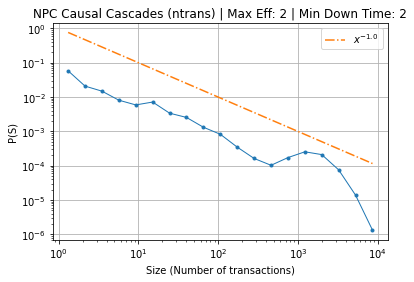

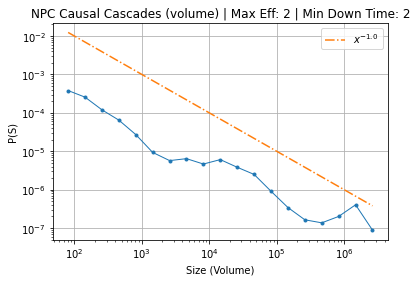

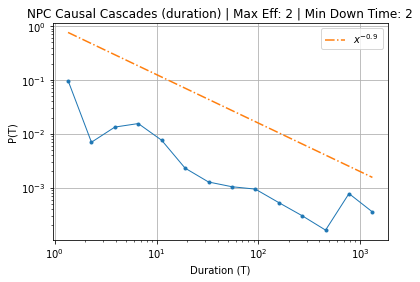

In [9]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

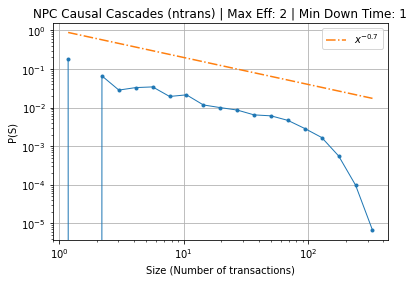

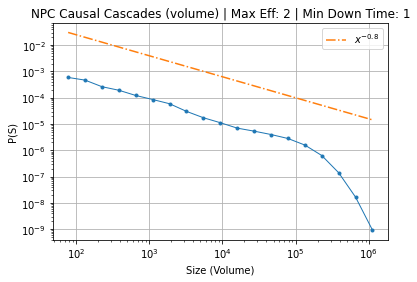

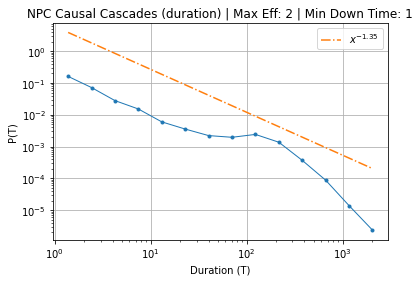

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

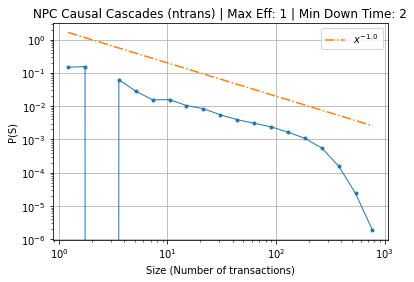

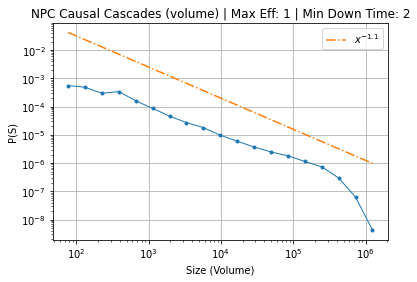

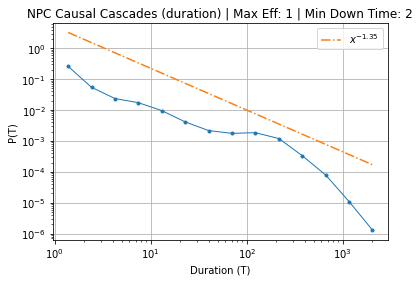

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

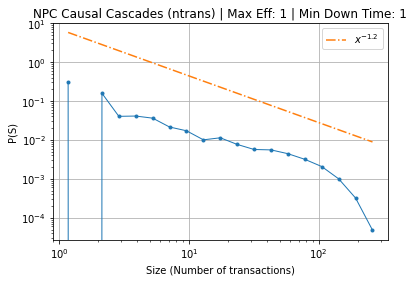

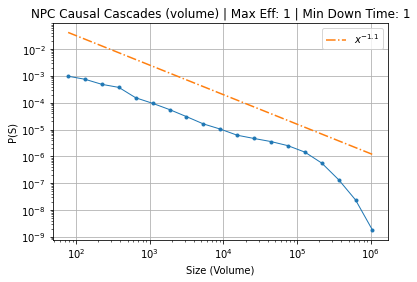

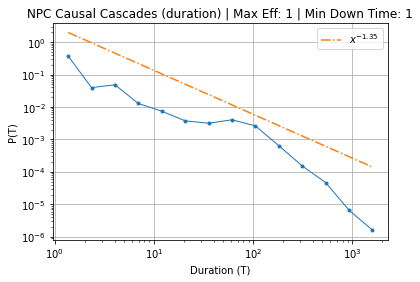

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
